In [1]:
#pip install pandas geopandas matplotlib descartes

In [2]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd
from statsmodels.nonparametric.smoothers_lowess import lowess
from splot.mapping import vba_choropleth

import matplotlib as mpl
from matplotlib.pylab import plt
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)

# import colormaps as cmaps
# plt.register_cmap(name='viridis', cmap=cmaps.viridis)
# plt.set_cmap(cmaps.viridis)
plt.viridis()

<Figure size 1080x648 with 0 Axes>

In [3]:
# Make directory
isExist = os.path.exists('static/')
if not isExist:

   # Create a new directory because it does not exist
   os.makedirs('static/')

In [4]:
df = pd.read_csv('processed_dataset_V2.csv', low_memory=False)
pd.options.display.max_columns = None
display(df)

# Load TS data
ts = pd.read_csv('processed_dataset_ts_long.csv', low_memory=False)
display(ts)

,Unnamed: 0,address/city,address/zipcode,bathrooms,bedrooms,homeStatus,latitude,livingArea,longitude,price,priceHistory/0/event,priceHistory/0/postingIsRental,priceHistory/0/price,priceHistory/0/priceChangeRate,priceHistory/0/time,priceHistory/1/event,priceHistory/1/postingIsRental,priceHistory/1/price,priceHistory/1/priceChangeRate,priceHistory/1/time,priceHistory/2/event,priceHistory/2/postingIsRental,priceHistory/2/price,priceHistory/2/priceChangeRate,priceHistory/2/time,priceHistory/3/event,priceHistory/3/postingIsRental,priceHistory/3/price,priceHistory/3/priceChangeRate,priceHistory/3/time,priceHistory/4/event,priceHistory/4/postingIsRental,priceHistory/4/price,priceHistory/4/priceChangeRate,priceHistory/4/time,priceHistory/5/event,priceHistory/5/postingIsRental,priceHistory/5/price,priceHistory/5/priceChangeRate,priceHistory/5/time,priceHistory/6/event,priceHistory/6/postingIsRental,priceHistory/6/price,priceHistory/6/priceChangeRate,priceHistory/6/time,priceHistory/7/event,priceHistory/7/postingIsRental,priceHistory/7/price,priceHistory/7/priceChangeRate,priceHistory/7/time,priceHistory/8/event,priceHistory/8/postingIsRental,priceHistory/8/price,priceHistory/8/priceChangeRate,priceHistory/8/time,priceHistory/9/event,priceHistory/9/postingIsRental,priceHistory/9/price,priceHistory/9/priceChangeRate,priceHistory/9/time,propertyTaxRate,resoFactsStats/atAGlanceFacts/0/factValue,resoFactsStats/atAGlanceFacts/1/factValue,resoFactsStats/bathrooms,resoFactsStats/bathroomsFull,resoFactsStats/bathroomsHalf,resoFactsStats/bedrooms,resoFactsStats/cityRegion,resoFactsStats/garageSpaces,resoFactsStats/hasAttachedGarage,resoFactsStats/hasAttachedProperty,resoFactsStats/hasCooling,resoFactsStats/hasGarage,resoFactsStats/hasHeating,resoFactsStats/hasOpenParking,resoFactsStats/hasView,resoFactsStats/homeType,resoFactsStats/livingArea,resoFactsStats/lotSize,resoFactsStats/parking,resoFactsStats/taxAnnualAmount,resoFactsStats/taxAssessedValue,resoFactsStats/yearBuilt,schools/0/distance,schools/0/level,schools/0/rating,schools/0/size,schools/0/studentsPerTeacher,schools/1/distance,schools/1/level,schools/1/rating,schools/1/size,schools/1/studentsPerTeacher,schools/2/distance,schools/2/isAssigned,schools/2/level,schools/2/rating,schools/2/size,schools/2/studentsPerTeacher,yearBuilt,zpid,number_of_photos,priceHistory/0/year,priceHistory/1/year,priceHistory/2/year,priceHistory/3/year,priceHistory/4/year,priceHistory/5/year,priceHistory/6/year,priceHistory/7/year,priceHistory/8/year,priceHistory/9/year,priceHistory/0/month_year,priceHistory/1/month_year,priceHistory/2/month_year,priceHistory/3/month_year,priceHistory/4/month_year,priceHistory/5/month_year,priceHistory/6/month_year,priceHistory/7/month_year,priceHistory/8/month_year,priceHistory/9/month_year,number_of_Listed for rent,number_of_Listed for sale,number_of_Listing removed,number_of_Pending sale,number_of_Price change,number_of_Sold,description_exists,description_lengths,days_on_Zillow,url_exists
0,0,0,10463.0,2.0,5.0,0,40.877743,1889.0,-73.910866,799999.0,Listed for sale,0.0,799999.0,0.335558,2021-01-08,Listing removed,0.0,599000.0,0.000000,2016-04-01,Listed for sale,0.0,599000.0,0.711429,2015-03-20,Listing removed,0.0,350000.0,0.000000,2010-12-23,Price change,0.0,350000.0,-0.066667,2010-06-10,Price change,0.0,375000.0,0.071429,2010-06-04,Listed for sale,0.0,350000.0,0.000000,2010-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.88,0.0,1920.0,2.0,1.0,1.0,5.0,0,0,0,0,1.0,0,1.0,0,0,0,1889.0,NaN,0,5096.0,711000.0,1920.0,0.1,1.0,4.0,647.0,14.0,0.1,2.0,3.0,993.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,1920.0,3.155405e+07,27,2021.0,2016.0,2015.0,2010.0,2010.0,2010.0,2010.0,NaN,NaN,NaN,2021-01,2016-04,2015-03,2010-12,2010-06,2010-06,2010-02,NaN,NaN,NaN,0,3,2,0,2,0,0,0,12.0,1
1,1,1,10471.0,8.0,8.0,0,40.892689,7000.0,-73.910667,3995000.0,Price change,0.0,3995000.0,-0.111235,2020-12-07,Price change,0.0,4495000.0,-0.080401,2020-10-01,Listed for sale,0.0,4888000.0,0.087430,2020-07-28,L

,Unnamed: 0,row_num,priceHistory/event,priceHistory/postingIsRental,priceHistory/price,priceHistory/priceChangeRate,priceHistory/time,priceHistory/year,priceHistory/month_year,zpid,address/zipcode,price,days_on_Zillow
0,0,0,Listed for sale,0.0,799999.0,0.335558,2021-01-08,2021.0,2021-01,31554048.0,10463.0,799999.0,12.0
1,1,0,Listing removed,0.0,599000.0,0.000000,2016-04-01,2016.0,2016-04,31554048.0,10463.0,799999.0,12.0
2,2,0,Listed for sale,0.0,599000.0,0.711429,2015-03-20,2015.0,2015-03,31554048.0,10463.0,799999.0,12.0
3,3,0,Listing removed,0.0,350000.0,0.000000,2010-12-23,2010.0,2010-12,31554048.0,10463.0,799999.0,12.0
4,4,0,Price change,0.0,350000.0,-0.066667,2010-06-10,2010.0,2010-06,31554048.0,10463.0,799999.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
722575,722575,72257,Listed for sale,0.0,925000.0,3.512195,2018-07-28,2018.0,2018-07,32004001.0,11375.0,820000.0,NaN
722576,722576,72257,Sold,0.0,205000.0,0.000000,1998-04-02,1998.0,1998-04,32004001.0,11375.0,820000.0,NaN
722577,722577,72257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32004001.0,11375.0,820000.0,NaN
722578,722578,72257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32004001.0,11375.0,820000.0,NaN


In [5]:
# Create ln price var
df['lnprice'] = np.log(df['price'])
ts['lnprice'] = np.log(ts['price'])

In [6]:
# Drop nan zips
dfzip = df[df['address/zipcode'].notna()]
dfzip['address/zipcode'] = dfzip['address/zipcode'].astype(int)
#dfzip = df[df['address/zipcode']!=-1]
display(dfzip)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16556\3302222962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfzip['address/zipcode'] = dfzip['address/zipcode'].astype(int)


,Unnamed: 0,address/city,address/zipcode,bathrooms,bedrooms,homeStatus,latitude,livingArea,longitude,price,priceHistory/0/event,priceHistory/0/postingIsRental,priceHistory/0/price,priceHistory/0/priceChangeRate,priceHistory/0/time,priceHistory/1/event,priceHistory/1/postingIsRental,priceHistory/1/price,priceHistory/1/priceChangeRate,priceHistory/1/time,priceHistory/2/event,priceHistory/2/postingIsRental,priceHistory/2/price,priceHistory/2/priceChangeRate,priceHistory/2/time,priceHistory/3/event,priceHistory/3/postingIsRental,priceHistory/3/price,priceHistory/3/priceChangeRate,priceHistory/3/time,priceHistory/4/event,priceHistory/4/postingIsRental,priceHistory/4/price,priceHistory/4/priceChangeRate,priceHistory/4/time,priceHistory/5/event,priceHistory/5/postingIsRental,priceHistory/5/price,priceHistory/5/priceChangeRate,priceHistory/5/time,priceHistory/6/event,priceHistory/6/postingIsRental,priceHistory/6/price,priceHistory/6/priceChangeRate,priceHistory/6/time,priceHistory/7/event,priceHistory/7/postingIsRental,priceHistory/7/price,priceHistory/7/priceChangeRate,priceHistory/7/time,priceHistory/8/event,priceHistory/8/postingIsRental,priceHistory/8/price,priceHistory/8/priceChangeRate,priceHistory/8/time,priceHistory/9/event,priceHistory/9/postingIsRental,priceHistory/9/price,priceHistory/9/priceChangeRate,priceHistory/9/time,propertyTaxRate,resoFactsStats/atAGlanceFacts/0/factValue,resoFactsStats/atAGlanceFacts/1/factValue,resoFactsStats/bathrooms,resoFactsStats/bathroomsFull,resoFactsStats/bathroomsHalf,resoFactsStats/bedrooms,resoFactsStats/cityRegion,resoFactsStats/garageSpaces,resoFactsStats/hasAttachedGarage,resoFactsStats/hasAttachedProperty,resoFactsStats/hasCooling,resoFactsStats/hasGarage,resoFactsStats/hasHeating,resoFactsStats/hasOpenParking,resoFactsStats/hasView,resoFactsStats/homeType,resoFactsStats/livingArea,resoFactsStats/lotSize,resoFactsStats/parking,resoFactsStats/taxAnnualAmount,resoFactsStats/taxAssessedValue,resoFactsStats/yearBuilt,schools/0/distance,schools/0/level,schools/0/rating,schools/0/size,schools/0/studentsPerTeacher,schools/1/distance,schools/1/level,schools/1/rating,schools/1/size,schools/1/studentsPerTeacher,schools/2/distance,schools/2/isAssigned,schools/2/level,schools/2/rating,schools/2/size,schools/2/studentsPerTeacher,yearBuilt,zpid,number_of_photos,priceHistory/0/year,priceHistory/1/year,priceHistory/2/year,priceHistory/3/year,priceHistory/4/year,priceHistory/5/year,priceHistory/6/year,priceHistory/7/year,priceHistory/8/year,priceHistory/9/year,priceHistory/0/month_year,priceHistory/1/month_year,priceHistory/2/month_year,priceHistory/3/month_year,priceHistory/4/month_year,priceHistory/5/month_year,priceHistory/6/month_year,priceHistory/7/month_year,priceHistory/8/month_year,priceHistory/9/month_year,number_of_Listed for rent,number_of_Listed for sale,number_of_Listing removed,number_of_Pending sale,number_of_Price change,number_of_Sold,description_exists,description_lengths,days_on_Zillow,url_exists,lnprice
0,0,0,10463,2.0,5.0,0,40.877743,1889.0,-73.910866,799999.0,Listed for sale,0.0,799999.0,0.335558,2021-01-08,Listing removed,0.0,599000.0,0.000000,2016-04-01,Listed for sale,0.0,599000.0,0.711429,2015-03-20,Listing removed,0.0,350000.0,0.000000,2010-12-23,Price change,0.0,350000.0,-0.066667,2010-06-10,Price change,0.0,375000.0,0.071429,2010-06-04,Listed for sale,0.0,350000.0,0.000000,2010-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.88,0.0,1920.0,2.0,1.0,1.0,5.0,0,0,0,0,1.0,0,1.0,0,0,0,1889.0,NaN,0,5096.0,711000.0,1920.0,0.1,1.0,4.0,647.0,14.0,0.1,2.0,3.0,993.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,1920.0,3.155405e+07,27,2021.0,2016.0,2015.0,2010.0,2010.0,2010.0,2010.0,NaN,NaN,NaN,2021-01,2016-04,2015-03,2010-12,2010-06,2010-06,2010-02,NaN,NaN,NaN,0,3,2,0,2,0,0,0,12.0,1,13.592366
1,1,1,10471,8.0,8.0,0,40.892689,7000.0,-73.910667,3995000.0,Price change,0.0,3995000.0,-0.111235,2020-12-07,Price change,0.0,4495000.0,-0.080401,2020-10-01,Listed for sale,0.0,4888000.0,0.08743

In [7]:
# Median house prices
p50_by_zip = dfzip.groupby('address/zipcode')['price'].median()
print(p50_by_zip)
p50 = p50_by_zip.reset_index()
p50.columns = ['address/zipcode', 'p50_by_zip']
print(p50)

address/zipcode
148      2450000.0
10001    2512500.0
10002     962500.0
10003    2297500.0
10004    1340000.0
           ...    
11697     475000.0
11755     295000.0
12694     350000.0
12764     145000.0
13277     399000.0
Name: price, Length: 196, dtype: float64
     address/zipcode  p50_by_zip
0                148   2450000.0
1              10001   2512500.0
2              10002    962500.0
3              10003   2297500.0
4              10004   1340000.0
..               ...         ...
191            11697    475000.0
192            11755    295000.0
193            12694    350000.0
194            12764    145000.0
195            13277    399000.0

[196 rows x 2 columns]


In [8]:
# Median ln house prices
lnp50_by_zip = dfzip.groupby('address/zipcode')['lnprice'].median()
print(lnp50_by_zip)
lnp50 = lnp50_by_zip.reset_index()
lnp50.columns = ['address/zipcode', 'lnp50_by_zip']
print(lnp50)

address/zipcode
148      14.711599
10001    14.736479
10002    13.776719
10003    14.647332
10004    14.080678
           ...    
11697    13.071070
11755    12.594731
12694    12.765688
12764    11.884489
13277    12.896717
Name: lnprice, Length: 196, dtype: float64
     address/zipcode  lnp50_by_zip
0                148     14.711599
1              10001     14.736479
2              10002     13.776719
3              10003     14.647332
4              10004     14.080678
..               ...           ...
191            11697     13.071070
192            11755     12.594731
193            12694     12.765688
194            12764     11.884489
195            13277     12.896717

[196 rows x 2 columns]


## Maps

In [9]:
# Load NYC zipcode shapefile
zipcode_shp = gpd.read_file("F:\Dropbox\Personal\Duke\Spring 2023\COMPSCI 590\Project\ZIP_CODE_040114\ZIP_CODE_040114.shp")
display(zipcode_shp)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17..."
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ..."
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20..."
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21..."


In [10]:
# Load boroughs shapefile
boroughs_shp = gpd.read_file("F:\Dropbox\Personal\Duke\Spring 2023\COMPSCI 590\Project\Borough Boundaries\geo_export_d6545f9d-905c-4b1e-a07d-16838d33c369.shp")
display(boroughs_shp)

,boro_code,boro_name,shape_area,shape_leng,geometry
0,5.0,Staten Island,1.623621e+09,325917.353702,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,2.0,Bronx,1.187175e+09,463179.772813,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,1.0,Manhattan,6.365208e+08,357564.316391,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
3,3.0,Brooklyn,1.934143e+09,728197.541089,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
4,4.0,Queens,3.041419e+09,888199.731579,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


In [11]:
# Load merged borough zip shapefile
bzip_shp = gpd.read_file("F:\Dropbox\Personal\Duke\Spring 2023\COMPSCI 590\Project\\nyc_borough_zip\\nyc_borough_zip.shp")
display(bzip_shp)

,boro_code,boro_name,shape_area,shape_leng,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_LEN,layer,path,geometry
0,5.0,Staten Island,1.623621e+09,325917.353702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Borough Boundaries - Copy geo_export_d6545f9d-...,/vsizip/F:\Dropbox\Personal\Duke\Spring 2023\C...,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,2.0,Bronx,1.187175e+09,463179.772813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Borough Boundaries - Copy geo_export_d6545f9d-...,/vsizip/F:\Dropbox\Personal\Duke\Spring 2023\C...,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,1.0,Manhattan,6.365208e+08,357564.316391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Borough Boundaries - Copy geo_export_d6545f9d-...,/vsizip/F:\Dropbox\Personal\Duke\Spring 2023\C...,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
3,3.0,Brooklyn,1.934143e+09,728197.541089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Borough Boundaries - Copy geo_export_d6545f9d-...,/vsizip/F:\Dropbox\Personal\Duke\Spring 2023\C...,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
4,4.0,Queens,3.041419e+09,888199.731579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Borough Boundaries - Copy geo_export_d6545f9d-...,/vsizip/F:\Dropbox\Personal\Duke\Spring 2023\C...,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,NaN,NaN,0.000000e+00,NaN,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,ZIP_CODE_040114 - Copy ZIP_CODE_040114,/vsizip/F:\Dropbox\Personal\Duke\Spring 2023\C...,"POLYGON ((-74.12065 40.64104, -74.12057 40.641..."
264,NaN,NaN,0.000000e+00,NaN,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,ZIP_CODE_040114 - Copy ZIP_CODE_040114,/vsizip/F:\Dropbox\Personal\Duke\Spring 2023\C...,"POLYGON ((-73.84076 40.62536, -73.84306 40.627..."
265,NaN,NaN,0.000000e+00,NaN,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,ZIP_CODE_040114 - Copy ZIP_CODE_040114,/vsizip/F:\Dropbox\Personal\Duke\Spring 2023\C...,"POLYGON ((-73.95805 40.72442, -73.95772 40.724..."
266,NaN,NaN,0.000000e+00,NaN,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,ZIP_CODE_040114 - Copy ZIP_CODE_040114,/vsizip/F:\Dropbox\Personal\Duke\Spring 2023\C...,"POLYGON ((-73.95133 40.76931, -73.95165 40.769..."


In [12]:
# Spatial Join
zipcode_shp = zipcode_shp.to_crs(epsg=2263)
boroughs_shp = boroughs_shp.to_crs(epsg=2263)

bzip_shp = zipcode_shp.sjoin(boroughs_shp, how="inner", predicate='intersects')
bzip_shp['ZIPCODE']=pd.to_numeric(bzip_shp['ZIPCODE'])
display(bzip_shp)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,index_right,boro_code,boro_name,shape_area,shape_leng
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",4,4.0,Queens,3.041419e+09,888199.731579
52,11357,0,Whitestone,38944.0,7.735911e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1032754.160 229746.959, 1032795.350 ...",4,4.0,Queens,3.041419e+09,888199.731579
55,11356,0,College Point,23379.0,4.332116e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1024499.860 226921.788, 1024502.126 ...",4,4.0,Queens,3.041419e+09,888199.731579
56,11359,0,Bayside,0.0,6.567982e+06,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1044673.160 228935.889, 1044671.935 ...",4,4.0,Queens,3.041419e+09,888199.731579
57,11360,0,Bayside,18973.0,3.883482e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1043330.530 227284.239, 1043339.600 ...",4,4.0,Queens,3.041419e+09,888199.731579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,10308,0,Staten Island,27612.0,6.275104e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((938154.387 143446.350, 938403.951 14...",0,5.0,Staten Island,1.623621e+09,325917.353702
155,10312,0,Staten Island,58506.0,1.690874e+08,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((928850.453 143511.403, 928874.915 14...",0,5.0,Staten Island,1.623621e+09,325917.353702
156,10309,0,Staten Island,33114.0,2.158358e+08,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((925030.252 142864.440, 925041.345 14...",0,5.0,Staten Island,1.623621e+09,325917.353702
157,10307,0,Staten Island,14096.0,4.602838e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((914830.906 127205.951, 914831.917 12...",0,5.0,Staten Island,1.623621e+09,325917.353702


In [13]:
# Merge data
zipcode_shp['ZIPCODE']=pd.to_numeric(zipcode_shp['ZIPCODE'])
merged_shp = pd.merge(zipcode_shp, p50, left_on='ZIPCODE', right_on='address/zipcode')
merged_shp = pd.merge(merged_shp, lnp50, left_on='ZIPCODE', right_on='address/zipcode')

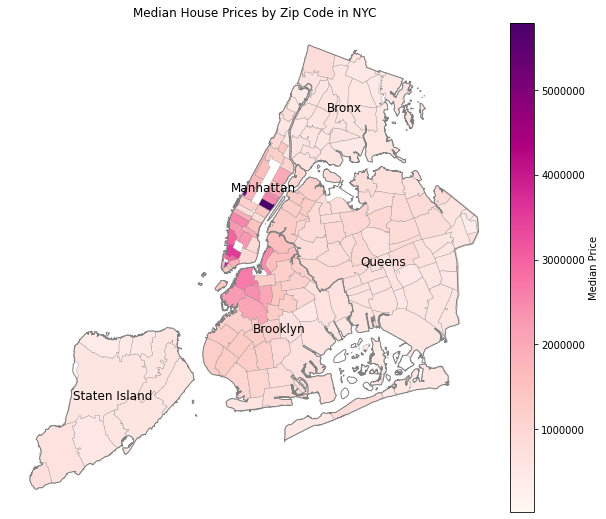

In [14]:
# Create a choropleth map of median house prices by zip code with borough boundaries
ax = merged_shp.plot(column='p50_by_zip', cmap='RdPu', legend=True, legend_kwds={'label': "Median Price",
                                    'orientation': "vertical",
                                   'pad': 0.01,
                                   'format':"%.0f"}, linewidth=0.3, edgecolor='gray')

# Plot the borough boundaries
boroughs_shp.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=1)

# Set the title of the map
ax.set_title('Median House Prices by Zip Code in NYC')

ax.axis('off')

# Add labels to the boroughs
for i, row in boroughs_shp.iterrows():
    ax.annotate(text=row['boro_name'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=12)
    
plt.savefig("static/Median House Prices by Zip Code in NYC.png", format="png", bbox_inches='tight')

# Show the map
plt.show()

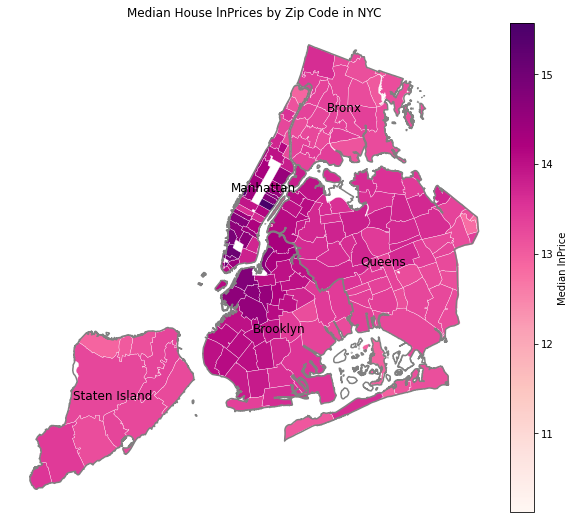

In [15]:
# Create a choropleth map of median ln house prices by zip code with borough boundaries
ax = merged_shp.plot(column='lnp50_by_zip', cmap='RdPu', legend=True, legend_kwds={'label': "Median lnPrice",
                                    'orientation': "vertical",
                                   'pad': 0.01,
                                   'format':"%.0f"}, linewidth=0.3, edgecolor='white')

# Plot the borough boundaries
boroughs_shp.plot(ax=ax, facecolor='none', edgecolor='grey', linewidth=1.5)

# Set the title of the map
ax.set_title('Median House lnPrices by Zip Code in NYC')

ax.axis('off')

# Add labels to the boroughs
for i, row in boroughs_shp.iterrows():
    ax.annotate(text=row['boro_name'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=12)
    
plt.savefig("static/Median House lnPrices by Zip Code in NYC.png", format="png", bbox_inches='tight')

# Show the map
plt.show()

In [16]:
# Check the current CRS of the GeoDataFrame
print(merged_shp.crs)

# Reproject the GeoDataFrame to a suitable projected CRS
merged_shp = merged_shp.to_crs(epsg=2263)
boroughs_shp = boroughs_shp.to_crs(epsg=2263)

# Check the new CRS of the GeoDataFrame
print(merged_shp.crs)

# Create new columns for latitude and longitude
merged_shp['latitude'] = merged_shp['geometry'].centroid.y
merged_shp['longitude'] = merged_shp['geometry'].centroid.x

# Print the first 5 rows of the GeoDataFrame, including the new columns
print(merged_shp.head())

EPSG:2263
EPSG:2263
   ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  COUNTY ST_FIPS  \
0    11436       0   Jamaica     18681.0  2.269930e+07    NY  Queens      36   
1    11213       0  Brooklyn     62426.0  2.963100e+07    NY   Kings      36   
2    11212       0  Brooklyn     83866.0  4.197210e+07    NY   Kings      36   
3    11225       0  Brooklyn     56527.0  2.369863e+07    NY   Kings      36   
4    11218       0  Brooklyn     72280.0  3.686880e+07    NY   Kings      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      081  http://www.usps.com/         0.0        0.0   
1      047  http://www.usps.com/         0.0        0.0   
2      047  http://www.usps.com/         0.0        0.0   
3      047  http://www.usps.com/         0.0        0.0   
4      047  http://www.usps.com/         0.0        0.0   

                                            geometry  address/zipcode_x  \
0  POLYGON ((1038098.252 188138.380, 1038141.936 ...              114

In [17]:
# # Create a 3D map of median house prices by zip code with borough boundaries
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Plot the surface
# ax.plot_trisurf(merged_shp['longitude'].values, merged_shp['latitude'].values, merged_shp['p50_by_zip'].values, cmap='viridis', edgecolor='none', alpha=0.5)

# #ax.scatter(merged_shp['longitude'], merged_shp['latitude'], merged_shp['p50_by_zip'], c=merged_shp['p50_by_zip'], cmap='viridis')

# # Set the perspective of the plot
# #ax.view_init(elev=20, azim=-130)

# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')
# ax.set_zlabel('Price')
# plt.show()

In [18]:
# group the sales data by zipcode and calculate the average number of sales per listing
sales_by_zip = dfzip.groupby('address/zipcode')['number_of_Sold'].agg(['mean']).round()
sales = sales_by_zip.reset_index()
sales.columns = ['address/zipcode', 'sales_by_zip']
print(sales)

     address/zipcode  sales_by_zip
0                148           1.0
1              10001           1.0
2              10002           1.0
3              10003           1.0
4              10004           1.0
..               ...           ...
191            11697           1.0
192            11755           1.0
193            12694           1.0
194            12764           1.0
195            13277           1.0

[196 rows x 2 columns]


In [19]:
# Merge data
merged_shp = pd.merge(merged_shp, sales, left_on='ZIPCODE', right_on='address/zipcode')

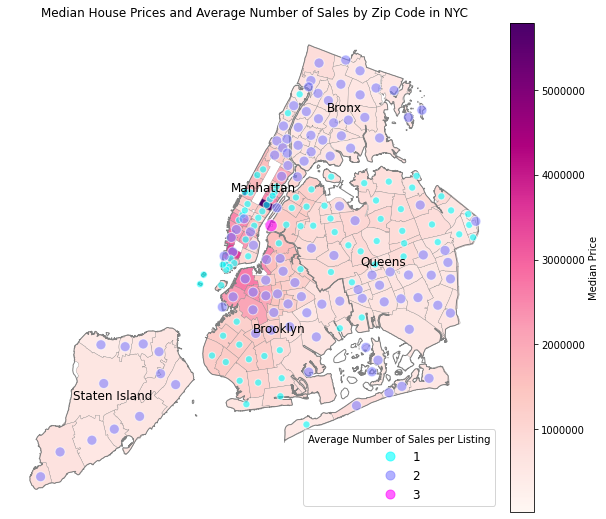

In [20]:
# Create a choropleth map of median house prices by zip code with borough boundaries
ax = merged_shp.plot(column='p50_by_zip', cmap='RdPu', legend=True, legend_kwds={'label': "Median Price",
                                    'orientation': "vertical",
                                   'pad': 0.01,
                                   'format':"%.0f"}, linewidth=0.3, edgecolor='gray')

# Plot the borough boundaries
boroughs_shp.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=1)

# add the bubbles
bubbles = ax.scatter(x=merged_shp['geometry'].centroid.x, y=merged_shp['geometry'].centroid.y, 
                s=merged_shp['sales_by_zip']*50, c=merged_shp['sales_by_zip'], cmap='cool', edgecolor='white', alpha = 0.6)

# Set the title of the map
ax.set_title('Median House Prices and Average Number of Sales by Zip Code in NYC')

ax.axis('off')

# Add labels to the boroughs
for i, row in boroughs_shp.iterrows():
    ax.annotate(text=row['boro_name'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=12)
    
# add a legend for the bubbles
legend = ax.legend(*bubbles.legend_elements(), loc='lower right', title='Average Number of Sales per Listing', fontsize=12, markerscale=1.5)

plt.savefig("static/Median House Prices and Average Number of Sales by Zip Code in NYC.png", format="png", bbox_inches='tight')

# Show the map
plt.show()

In [21]:
# from matplotlib.patches import Patch
# import matplotlib.colors as colors

# norm1 = colors.Normalize(vmin=min_value, vmax=max_value)

# # Define color scheme for each variable
# color_scheme1 = 'Blues'
# color_scheme2 = 'Reds'

# # Create bivariate choropleth map
# fig, ax = plt.subplots(figsize=(12, 10))

# merged_shp.plot(column='p50_by_zip', cmap=color_scheme1, ax=ax, edgecolor='gray')
# merged_shp.plot(column='sales_by_zip', cmap=color_scheme2, ax=ax, alpha=0.5, edgecolor='gray')

# # create square legend
# # Create a custom handler map to display colorbar as a square legend
# handler_map = {tuple: plt.cm.ScalarMappable(norm=norm1, cmap=cmap1)}
# legend_labels = ["Low Pct White", "Medium Pct White", "High Pct White"]

# # Plot the colorbar as a square legend
# fig.colorbar(plt.cm.ScalarMappable(norm=norm1, cmap=cmap1), ax=ax, fraction=0.046, pad=0.04, label="Percentage White", ticks=bounds1)
# ax.legend(handles=[Patch(color=color, label=label) for color, label in zip(colors1, legend_labels)], loc='lower left', bbox_to_anchor=(0, -0.2), ncol=3, handler_map=handler_map)

# ax.set_title('Bivariate Choropleth Map')
# ax.axis('off')

# plt.show()

In [22]:
# Define sets of 9 colors to be used
# Order: bottom-left, bottom-center, bottom-right, center-left, center-center, center-right, top-left, top-center, top-right
color_sets = {
    'pink-blue':   ['#e8e8e8', '#ace4e4', '#5ac8c8', '#dfb0d6', '#a5add3', '#5698b9', '#be64ac', '#8c62aa', '#3b4994'],
    'teal-red':    ['#e8e8e8', '#e4acac', '#c85a5a', '#b0d5df', '#ad9ea5', '#985356', '#64acbe', '#627f8c', '#574249'],
    'blue-organe': ['#fef1e4', '#fab186', '#f3742d',  '#97d0e7', '#b0988c', '#ab5f37', '#18aee5', '#407b8f', '#5c473d']
}


my_cmap = mcolors.ListedColormap(color_sets['pink-blue'])

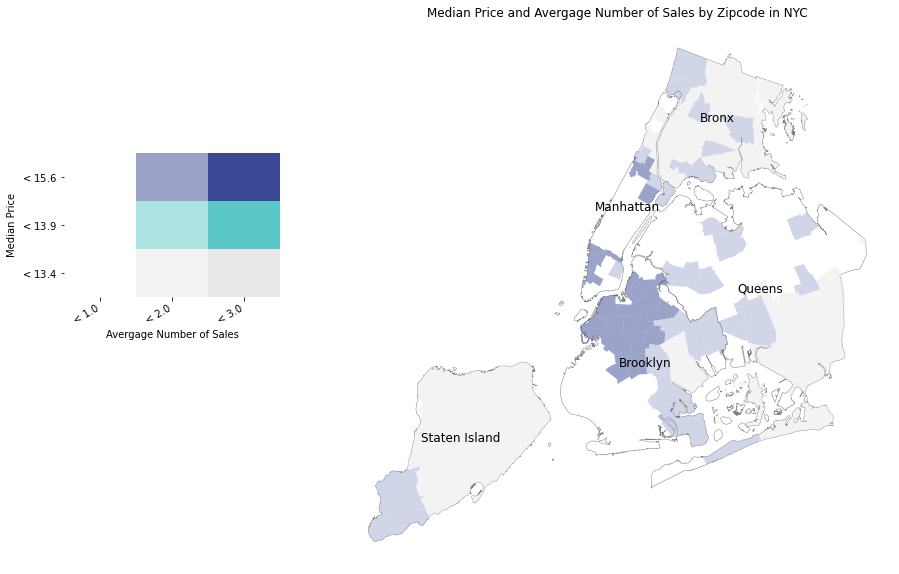

In [23]:
x = merged_shp['lnp50_by_zip'].values
y = merged_shp['sales_by_zip'].values

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

# Plot the borough boundaries
boroughs_shp.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=0.5)

vba_choropleth(x, y, merged_shp, rgb_variable = 'Median Price', alpha_variable ='Avergage Number of Sales',
               alpha_mapclassify=dict(classifier='quantiles', k=3),
               rgb_mapclassify=dict(classifier='quantiles', k=3),
               legend=True, ax=ax, 
              cmap = my_cmap)

# Add labels to the boroughs
for i, row in boroughs_shp.iterrows():
    ax.annotate(text=row['boro_name'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=12)
    
ax.set_title('Median Price and Avergage Number of Sales by Zipcode in NYC')
    
plt.savefig("static/Median Price and Avergage Number of Sales by Zipcode in NYC.png", format="png", bbox_inches='tight')

plt.show()

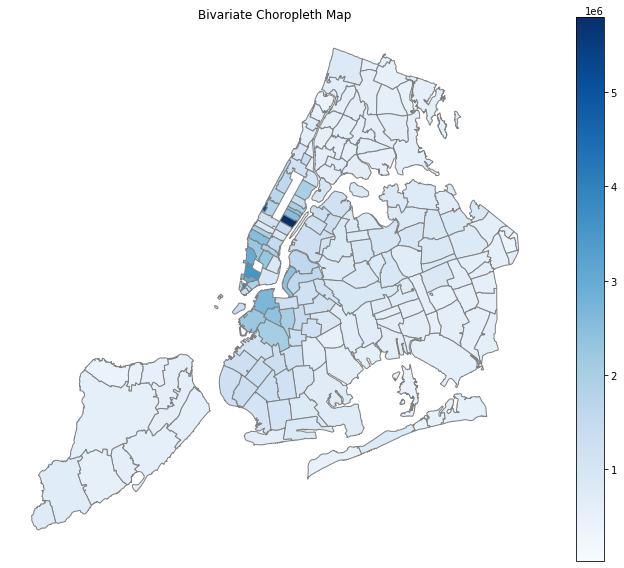

In [24]:

# Define color scheme for each variable
color_scheme1 = 'Blues'
color_scheme2 = 'Reds'

# Create bivariate choropleth map
fig, ax = plt.subplots(figsize=(12, 10))

merged_shp.plot(column='p50_by_zip', cmap=color_scheme1, ax=ax, edgecolor='gray', legend=True)
#merged_shp.plot(column='sales_by_zip', cmap=color_scheme2, ax=ax, alpha=0.5, edgecolor='gray', legend=True)

ax.set_title('Bivariate Choropleth Map')
ax.axis('off')

plt.show()

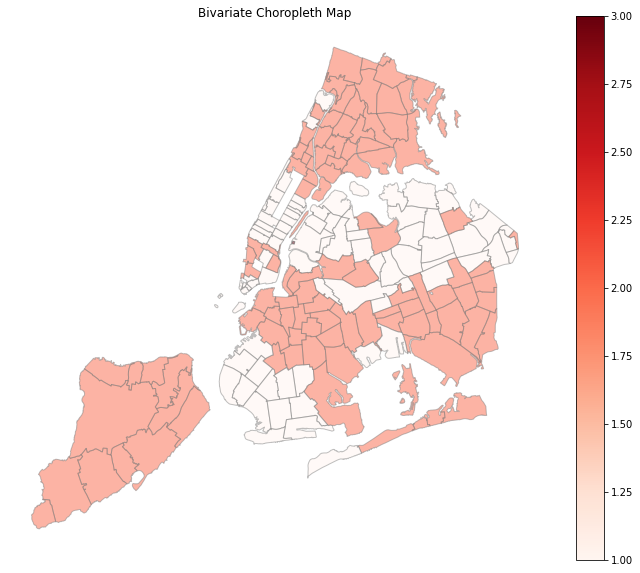

In [25]:
# Define color scheme for each variable
color_scheme1 = 'Blues'
color_scheme2 = 'Reds'

# Create bivariate choropleth map
fig, ax = plt.subplots(figsize=(12, 10))

#merged_shp.plot(column='p50_by_zip', cmap=color_scheme1, ax=ax, edgecolor='gray')
merged_shp.plot(column='sales_by_zip', cmap=color_scheme2, ax=ax, alpha=0.5, edgecolor='gray', legend=True)

ax.set_title('Bivariate Choropleth Map')
ax.axis('off')

plt.show()

In [26]:
# group the days on Zillow data by zipcode and calculate the median number of days per listing
days_by_zip = dfzip.groupby('address/zipcode')['days_on_Zillow'].agg(['median'])
days = days_by_zip.reset_index()
days.columns = ['address/zipcode', 'days_by_zip']
print(days)

     address/zipcode  days_by_zip
0                148          NaN
1              10001        133.0
2              10002         79.0
3              10003        133.5
4              10004         58.0
..               ...          ...
191            11697          7.0
192            11755          NaN
193            12694          NaN
194            12764          NaN
195            13277          NaN

[196 rows x 2 columns]


In [27]:
# Merge data
merged_shp = pd.merge(merged_shp, days, left_on='ZIPCODE', right_on='address/zipcode')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16556\573558885.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'address/zipcode_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_shp = pd.merge(merged_shp, days, left_on='ZIPCODE', right_on='address/zipcode')


In [28]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [29]:
# Keep only the "good" points
# "~" operates as a logical not operator on boolean numpy arrays
df['filtered'] = df['price'][~is_outlier(df['price'])]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16556\3611878041.py:24: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]


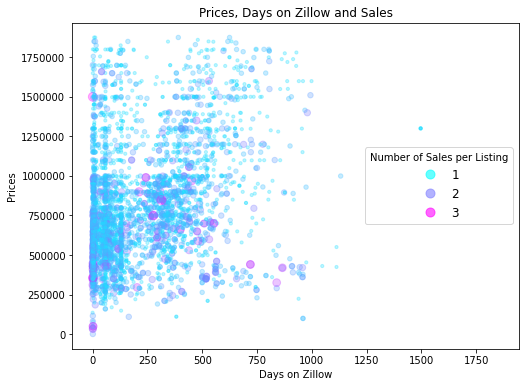

In [30]:
# Create the scatter plot
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x=df['days_on_Zillow'], y=df['filtered'], s=df['number_of_Sold']*10, 
           c=df['number_of_Sold'], cmap='cool', edgecolor=None, alpha=0.3)

# Set axis labels and title
ax.set_xlabel('Days on Zillow')
ax.set_ylabel('Prices')
ax.set_title('Prices, Days on Zillow and Sales')

plt.ticklabel_format(style='plain')    # to prevent scientific notation.

# add a legend for the bubbles
legend = ax.legend(*bubbles.legend_elements(), loc='right', title='Number of Sales per Listing', fontsize=12, markerscale=1.5)

plt.show()

[101, 182, 184]
[979.0, 159.0, 70.5] [1325000.0, 5795000.0, 5195000.0]
['10005: Wall Street|Downtown|Manhattan', '10065: Upper East Side|Uptown|Manhattan', '10069: Upper West Side|West Side|Uptown|Manhattan']


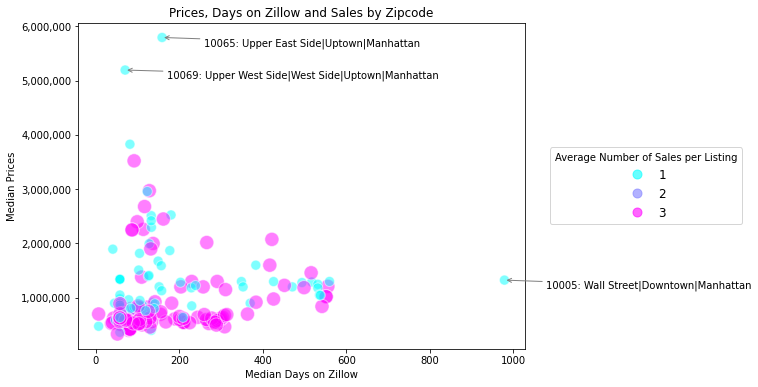

In [31]:
# Create the scatter plot
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x=merged_shp['days_by_zip'], y=merged_shp['p50_by_zip'], s=merged_shp['sales_by_zip']*100, 
           c=merged_shp['sales_by_zip'], cmap='cool', edgecolor='white', alpha=0.5)

# Set axis labels and title
ax.set_xlabel('Median Days on Zillow')
ax.set_ylabel('Median Prices')
ax.set_title('Prices, Days on Zillow and Sales by Zipcode')

ax.get_yaxis().set_major_formatter(
        mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))    # to prevent scientific notation.

# add a legend for the bubbles
legend = ax.legend(*bubbles.legend_elements(), bbox_to_anchor=(1, 0,0.5,1), loc='right', title='Average Number of Sales per Listing', fontsize=12, markerscale=1.5)

# annotate bubble
# row = np.concatenate(
#     merged_shp['ZIPCODE'].loc[np.where(merged_shp['days_by_zip']>800)], 
#     merged_shp['ZIPCODE'].loc[np.where(merged_shp['p50_by_zip']>5000000)]
# )

row = []
for i in range(len(merged_shp)):
    if merged_shp['days_by_zip'][i] > 800 or merged_shp['p50_by_zip'][i] > 5000000:
        row.append(i)
print(row)

x_c = list(merged_shp['days_by_zip'].iloc[row])
y_c = list(merged_shp['p50_by_zip'].iloc[row])
print(x_c,y_c)
#size_c = sizes[2]
label_c1 = merged_shp['ZIPCODE'].iloc[row]
label_c2 = ['Wall Street|Downtown|Manhattan', 'Upper East Side|Uptown|Manhattan', 'Upper West Side|West Side|Uptown|Manhattan']
label_c = [str(int(i)) + ': ' + str(j) for i,j in zip(label_c1, label_c2)]
print(label_c)

for xi, yi, text in zip(x_c, y_c, label_c):
    ax.annotate(text,  xy=(xi, yi), xytext=(xi+100, yi+100),
                fontsize=10, ha='left', va='top',
                #bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                arrowprops=dict(arrowstyle='->', color='gray'))
    
plt.savefig("static/Prices, Days on Zillow and Sales by Zipcode.png", format="png", bbox_inches='tight')

plt.show()

In [32]:
print(merged_shp['ZIPCODE'].loc[np.where(merged_shp['days_by_zip']>800)]) #WALL STREET, Financial district, Wall Street|Downtown|Manhattan

101    10005
Name: ZIPCODE, dtype: int64


In [33]:
print(merged_shp['ZIPCODE'].loc[np.where(merged_shp['p50_by_zip']>5000000)]) 
# Upper East Side|Uptown|Manhattan
# Upper West Side|West Side|Uptown|Manhattan

182    10065
184    10069
Name: ZIPCODE, dtype: int64


NY 10065:

It also has an extremely large population density.

There are also an extremely large number of single adults and an extremely small number of families. The percentage of children under 18 living in the 10065 ZIP code is extremely small compared to other areas of the country.

ZIP code 10065 is located in southeast New York and covers a slightly less than average land area compared to other ZIP codes in the United States. It also has an extremely large population density.

The people living in ZIP code 10065 are primarily white. The number of people in their late 20s to early 40s is extremely large while the number of seniors is large. There are also an extremely large number of single adults and an extremely small number of families. The percentage of children under 18 living in the 10065 ZIP code is extremely small compared to other areas of the country.

ZIP code 10065 has a slightly higher than average percentage of vacancies. The Census also indicates that there are one or more universities nearby.

The majority of household are rented. Homes in ZIP code 10065 were primarily built in 1939 or earlier or the 1960s. Looking at 10065 real estate data, the median home value of $1,000,001 is extremely high compared to the rest of the country. It is also high compared to nearby ZIP codes. So you are less likely to find inexpensive homes in 10065. Rentals in 10065 are most commonly 1 bedrooms.

likely to be one of the nicer parts of town with a more affluent demographic.

ZIP 10065 is unusual in that "Public transportation" is the most frequent method of transportation to work instead of vehicles. ZIP code 10065 uses public transportation to get to work more than almost anywhere in the country. 10065 is extremely friendly to pedestrians/cyclists and the percentage of people using these transportation methods to commute to work are among the highest in the country.

Source: https://www.unitedstateszipcodes.org/10065/

Also see: https://www.businessinsider.com/americas-most-expensive-zip-code-10065-2012-10

NY 10069:
    
   78% HHs withouth kids
   
The majority of household are rented. Homes in ZIP code 10069 were primarily built in the 2000s. Looking at 10069 real estate data, the median home value of $966,600 is extremely high compared to the rest of the country.

same ase above mostly.

SOurce: https://www.unitedstateszipcodes.org/10069/

## TS Plots

In [34]:
original_ts = ts.copy()
ts = ts[ts['priceHistory/year'].notna()]
ts = ts[ts['price'].notna()]
time, yr, mth, p, lnp =\
pd.to_datetime(ts['priceHistory/time']), ts['priceHistory/year'].astype('int'), pd.to_datetime(ts['priceHistory/month_year']), ts['price'], ts['lnprice']

In [35]:
# 1. Moving Average
#ts_ma = p.rolling(1000, center=True, closed='both').mean()

# # 2. Loess Smoothing (15% and 30%) ## Taking forever to run
# ts_loess_15 = pd.DataFrame(lowess(p, np.arange(len(p)), frac=0.15)[:, 1], index=ts.index, columns=['price'])
# ts_loess_30 = pd.DataFrame(lowess(p, np.arange(len(p)), frac=0.30)[:, 1], index=ts.index, columns=['price'])

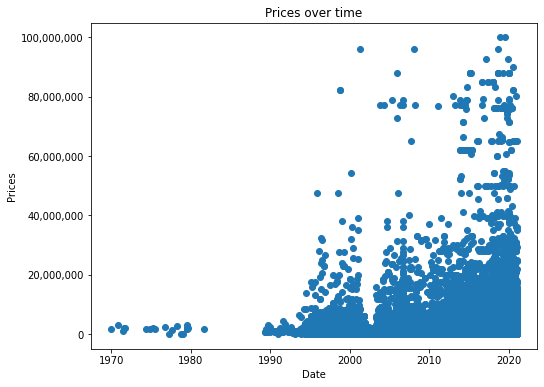

In [36]:
# Dot Plot
#plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot_date(time, p)

# ax.ts_loess_15['price'].plot(label='Loess Smoothed 15%')
# ax.ts_loess_30['price'].plot(label='Loess Smoothed 30%')
#ax.plot(time, ts_ma, label='Moving Average (1000)')

# Set axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Prices')
ax.set_title('Prices over time')

ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))    # to prevent scientific notation.

plt.savefig("static/Dot Plot.png", format="png")

plt.show()

In [37]:
# Drop nan zips
tszip = ts[ts['address/zipcode'].notna()]
tszip['address/zipcode'] = tszip['address/zipcode'].astype(int)
#dfzip = df[df['address/zipcode']!=-1]
display(tszip)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16556\3747024924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tszip['address/zipcode'] = tszip['address/zipcode'].astype(int)


,Unnamed: 0,row_num,priceHistory/event,priceHistory/postingIsRental,priceHistory/price,priceHistory/priceChangeRate,priceHistory/time,priceHistory/year,priceHistory/month_year,zpid,address/zipcode,price,days_on_Zillow,lnprice
0,0,0,Listed for sale,0.0,799999.0,0.335558,2021-01-08,2021.0,2021-01,31554048.0,10463,799999.0,12.0,13.592366
1,1,0,Listing removed,0.0,599000.0,0.000000,2016-04-01,2016.0,2016-04,31554048.0,10463,799999.0,12.0,13.592366
2,2,0,Listed for sale,0.0,599000.0,0.711429,2015-03-20,2015.0,2015-03,31554048.0,10463,799999.0,12.0,13.592366
3,3,0,Listing removed,0.0,350000.0,0.000000,2010-12-23,2010.0,2010-12,31554048.0,10463,799999.0,12.0,13.592366
4,4,0,Price change,0.0,350000.0,-0.066667,2010-06-10,2010.0,2010-06,31554048.0,10463,799999.0,12.0,13.592366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722572,722572,72257,Price change,0.0,845000.0,-0.049374,2018-11-13,2018.0,2018-11,32004001.0,11375,820000.0,NaN,13.617060
722573,722573,72257,Price change,0.0,888888.0,-0.006829,2018-10-01,2018.0,2018-10,32004001.0,11375,820000.0,NaN,13.617060
722574,722574,72257,Price change,0.0,895000.0,-0.032432,2018-08-28,2018.0,2018-08,32004001.0,11375,820000.0,NaN,13.617060
722575,722575,72257,Listed for sale,0.0,925000.0,3.512195,2018-07-28,2018.0,2018-07,32004001.0,11375,820000.0,NaN,13.617060


In [38]:
# Merge data
ts_merged_shp = pd.merge(bzip_shp, tszip, left_on='ZIPCODE', right_on='address/zipcode')
display(ts_merged_shp)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,index_right,boro_code,boro_name,shape_area,shape_leng,Unnamed: 0,row_num,priceHistory/event,priceHistory/postingIsRental,priceHistory/price,priceHistory/priceChangeRate,priceHistory/time,priceHistory/year,priceHistory/month_year,zpid,address/zipcode,price,days_on_Zillow,lnprice
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",4,4.0,Queens,3.041419e+09,888199.731579,316780,31678,Sold,0.0,481650.0,0.337917,2019-06-07,2019.0,2019-06,8.305298e+07,11436,481650.0,NaN,13.084973
1,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",4,4.0,Queens,3.041419e+09,888199.731579,316781,31678,Sold,0.0,360000.0,0.440000,2003-09-16,2003.0,2003-09,8.305298e+07,11436,481650.0,NaN,13.084973
2,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",4,4.0,Queens,3.041419e+09,888199.731579,316782,31678,Sold,0.0,250000.0,0.000000,2000-02-28,2000.0,2000-02,8.305298e+07,11436,481650.0,NaN,13.084973
3,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",4,4.0,Queens,3.041419e+09,888199.731579,361890,36189,Sold,0.0,525000.0,0.000000,2019-11-25,2019.0,2019-11,2.137669e+09,11436,525000.0,NaN,13.171154
4,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",4,4.0,Queens,3.041419e+09,888199.731579,361920,36192,Sold,0.0,525000.0,0.000000,2019-11-25,2019.0,2019-11,2.137669e+09,11436,525000.0,NaN,13.171154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397648,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17...",0,5.0,Staten Island,1.623621e+09,325917.353702,481368,48136,Price change,0.0,579000.0,-0.015306,2018-06-27,2018.0,2018-06,3.227839e+07,10310,508500.0,NaN,13.139220
397649,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17...",0,5.0,Staten Island,1.623621e+09,325917.353702,481369,48136,Price change,0.0,588000.0,-0.006757,2018-06-13,2018.0,2018-06,3.227839e+07,10310,508500.0,NaN,13.139220
397650,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17...",0,5.0,Staten Island,1.623621e+09,325917.353702,481750,48175,Sold,0.0,422500.0,-0.119608,2020-07-15,2020.0,2020-07,3.227950e+07,10310,422500.0,NaN,12.953945
397651,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17...",0,5.0,Staten Island,1.623621e+09,325917.353702,481751,48175,Listing removed,0.0,479900.0,0.000000,2020-05-20,2020.0,2020-05,3.227950e+07,10310,422500.0,NaN,12.953945


In [39]:
boros = list(set(ts_merged_shp['boro_name']))
print(boros, len(boros))

['Bronx', 'Manhattan', 'Brooklyn', 'Staten Island', 'Queens'] 5


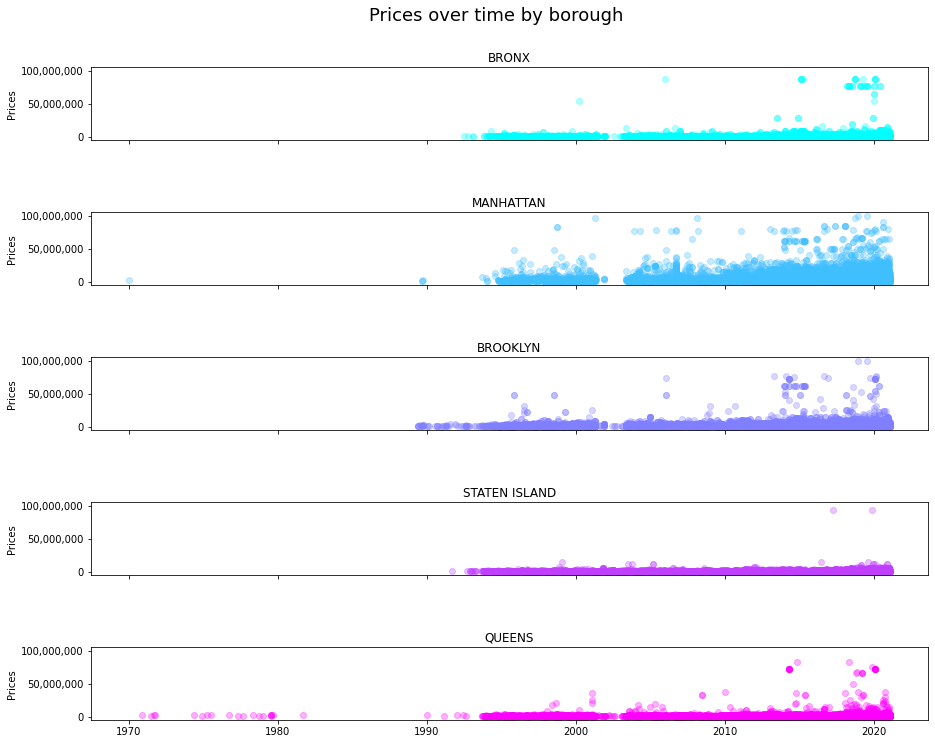

In [40]:
# Prices over time
# define subplot grid

CM = plt.get_cmap('cool')
# 2. Segmenting the whole range (from 0 to 1) of the color map into multiple segments
slicedCM = CM(np.linspace(0, 1, len(boros)))

fig, axs = plt.subplots(nrows=len(boros), ncols=1, figsize=(15, 12), sharex=True, sharey=True)
plt.subplots_adjust(hspace=1)
fig.suptitle("Prices over time by borough", fontsize=18, y=0.95)

# loop through tickers and axes
for boro, ax, i in zip(boros, axs.ravel(), range(len(boros))):
    # filter df for boro and plot on specified axes
    ax.plot_date(
        pd.to_datetime(ts_merged_shp['priceHistory/time'].loc[ts_merged_shp["boro_name"] == boro]), 
        ts_merged_shp['price'].loc[ts_merged_shp["boro_name"] == boro],
        c=slicedCM[i], alpha=0.3 
    )

    # chart formatting
    ax.set_title(boro.upper())
    #ax.get_legend().remove()
    
    # Set axis labels and title
    ax.set_ylabel('Prices')
    if i == len(boros):
          ax.set_xlabel('Date')
    else:
        ax.set_xlabel('')

    ax.get_yaxis().set_major_formatter(
        mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))    # to prevent scientific notation.

plt.savefig("static/Prices over time by borough.png", format="png")

plt.show()

9875      1400000.0
9876      1400000.0
9877      1400000.0
9878      1400000.0
9879       449000.0
            ...    
292149     765000.0
292150     765000.0
292152     750000.0
292158     613000.0
292176     525000.0
Name: price, Length: 12758, dtype: float64


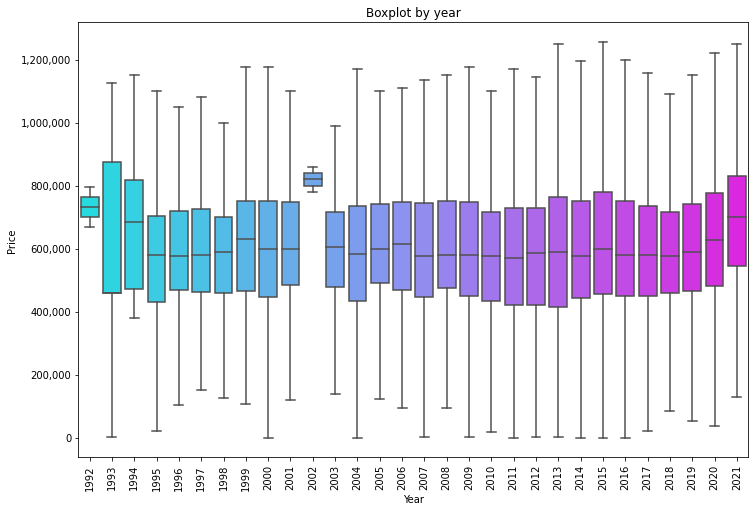

In [61]:
print(ts_merged_shp['price'].loc[ts_merged_shp["boro_name"] == "Bronx"].loc[ts_merged_shp["priceHistory/year"] == 2020])

# Boxplot by year
fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(x=ts_merged_shp['priceHistory/year'].loc[ts_merged_shp["boro_name"] == "Bronx"].astype(int), y=ts_merged_shp['price'].loc[ts_merged_shp["boro_name"] == "Bronx"], palette ='cool', showfliers=False)

plt.xticks(rotation=90)

# Set axis labels and title
ax.set_ylabel('Price')
ax.set_xlabel('Year')
ax.set_title('Boxplot by year')

ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))    # to prevent scientific notation.
    
plt.show()

In [84]:
# determine all needed categoricals        
uniqueoptions = sorted(ts_merged_shp['priceHistory/year'].astype(int).unique())
struniqueoptions = [str(x) for x in uniqueoptions]
print(uniqueoptions, struniqueoptions)

[1969, 1970, 1971, 1974, 1975, 1976, 1977, 1978, 1979, 1981, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021] ['1969', '1970', '1971', '1974', '1975', '1976', '1977', '1978', '1979', '1981', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


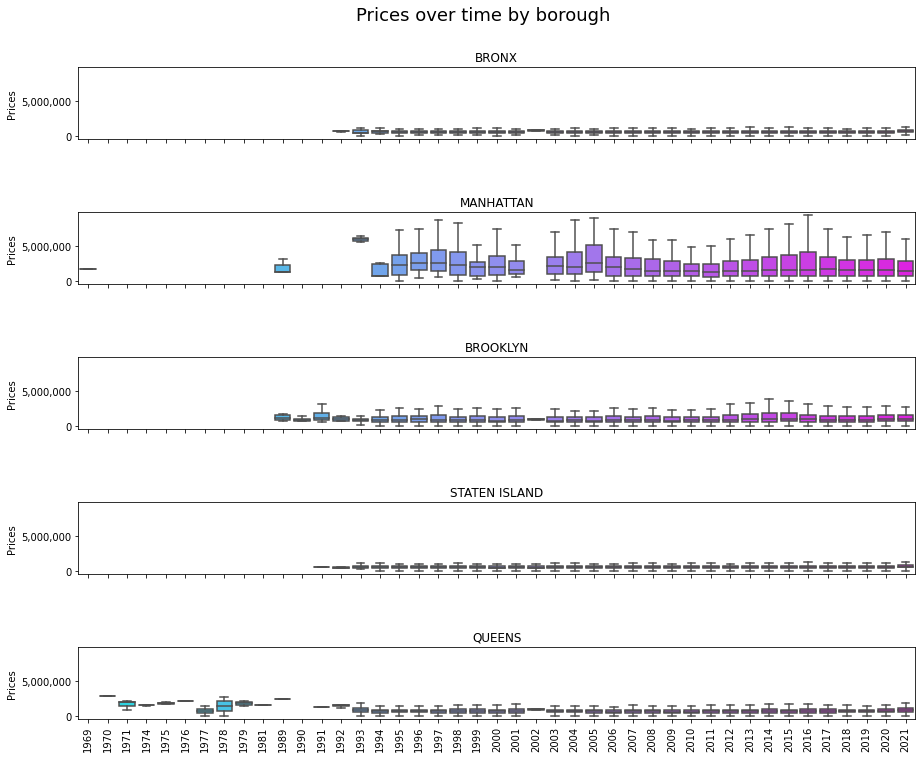

In [87]:
# Prices over time: Box plots
# define subplot grid

fig, axs = plt.subplots(nrows=len(boros), ncols=1, figsize=(15, 12), sharex=True, sharey=True)
plt.subplots_adjust(hspace=1)
fig.suptitle("Prices over time by borough", fontsize=18, y=0.95)


# loop through boroughs and axes
for boro, ax, i in zip(boros, axs.ravel(), range(len(boros))):
    # filter df for boro and create boxplot on specified axes
    sns.boxplot(x=ts_merged_shp['priceHistory/year'].loc[ts_merged_shp["boro_name"] == boro].astype(int).astype(str), 
                y=ts_merged_shp['price'].loc[ts_merged_shp["boro_name"] == boro],
                ax=ax, order=struniqueoptions, palette ='cool', showfliers=False)

    # chart formatting
    ax.set_title(boro.upper())
    
    # Set axis labels and title
    ax.set_ylabel('Prices')
    if i == len(boros):
          ax.set_xlabel('Year')
    else:
        ax.set_xlabel('')
        
    ax.get_yaxis().set_major_formatter(
        mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))    # to prevent scientific notation.
    
    ax.set_xticklabels(struniqueoptions,rotation=90)


plt.savefig("static/Prices over time by borough_bp.png", format="png")
plt.show()

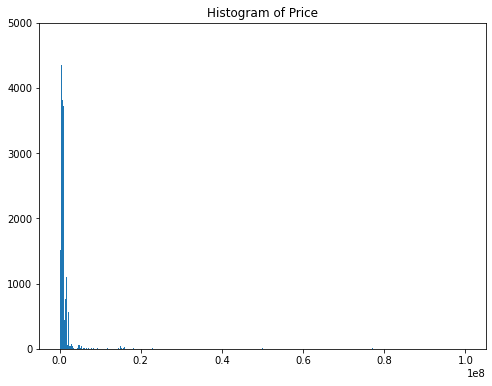

In [42]:
# Histogram and Density Plot of Price
fig, ax = plt.subplots(figsize=(8, 6))
p.hist(bins='auto')
ax.set_title('Histogram of Price')
ax.set_ylim(top=5000)
ax.grid(False)

plt.savefig("static/Histogram of Price.png", format="png")

plt.show()

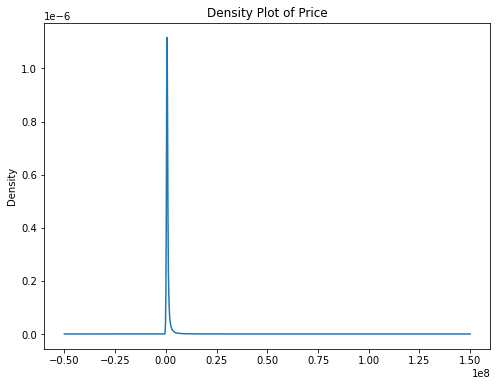

In [43]:
# Density Plot of lnPrice
fig, ax = plt.subplots(figsize=(8, 6))
p.plot(kind='kde')
ax.set_title('Density Plot of Price')

plt.savefig("static/Density Plot of Price.png", format="png")

plt.show()

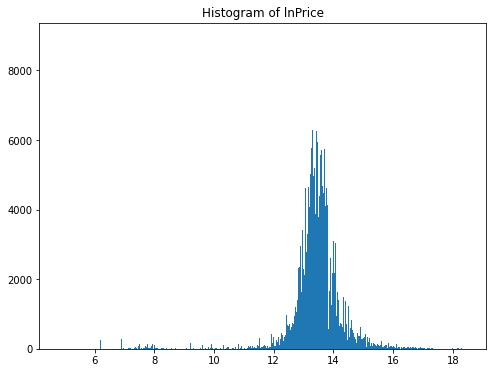

In [44]:
# Histogram of lnPrice
fig, ax = plt.subplots(figsize=(8, 6))
lnp.hist(bins='auto')
ax.set_title('Histogram of lnPrice')
ax.grid(False)

plt.savefig("static/Histogram of lnPrice.png", format="png")

plt.show()

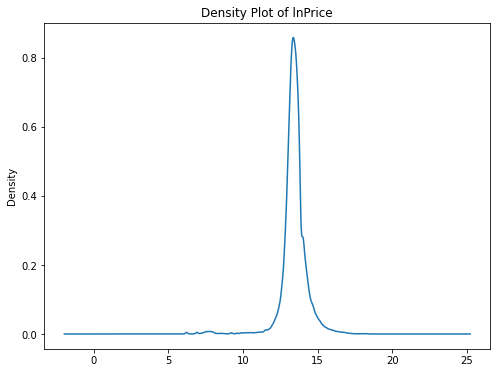

In [45]:
# Density Plot of lnPrice
fig, ax = plt.subplots(figsize=(8, 6))
lnp.plot(kind='kde')
ax.set_title('Density Plot of lnPrice')

plt.savefig("static/Density Plot of lnPrice.png", format="png")

plt.show()

In [46]:
# # Boxplot by year
# years = ts[['priceHistory/year', 'price']]
# years['priceHistory/year'] = ts['priceHistory/year'].astype('int')
# years['priceHistory/year'] = pd.to_datetime(years['priceHistory/year'], format='%Y')
# years = years.set_index('priceHistory/year')
# display(years)
# groups = years.groupby(pd.Grouper(freq='A'))
# bp = pd.DataFrame()
# for name, group in groups:
#     print(name, group.values)
#     bp[name.year] = group.values
# bp.boxplot()
# plt.show()

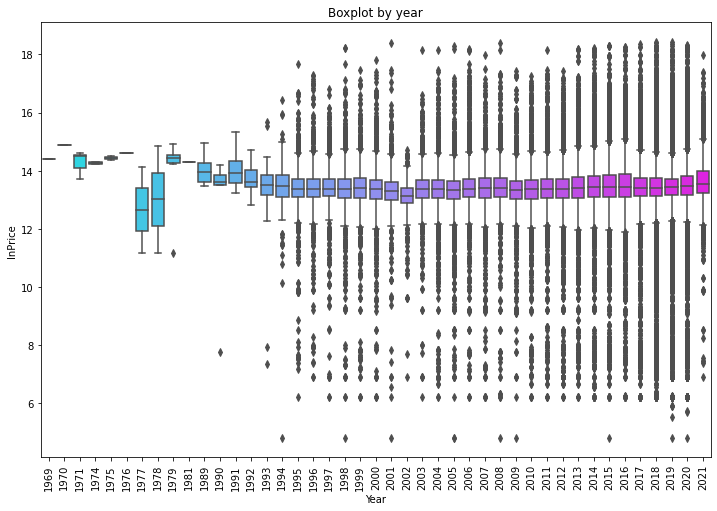

In [47]:
# Boxplot by year
fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(x=yr, y=lnp, palette ='cool')

plt.xticks(rotation=90)

# Set axis labels and title
ax.set_ylabel('lnPrice')
ax.set_xlabel('Year')
ax.set_title('Boxplot by year')

plt.savefig("static/Boxplot by year.png", format="png")
    
plt.show()

## Race and Tax data

In [48]:
df2 = pd.read_csv('processed_dataset.csv', low_memory=False)
pd.options.display.max_columns = None
display(df2)

,Unnamed: 0,address/city,address/zipcode,bathrooms,bedrooms,homeStatus,latitude,livingArea,longitude,price,propertyTaxRate,resoFactsStats/bathrooms,resoFactsStats/bathroomsFull,resoFactsStats/bathroomsHalf,resoFactsStats/bedrooms,resoFactsStats/cityRegion,resoFactsStats/garageSpaces,resoFactsStats/hasAttachedGarage,resoFactsStats/hasAttachedProperty,resoFactsStats/hasCooling,resoFactsStats/hasGarage,resoFactsStats/hasHeating,resoFactsStats/hasOpenParking,resoFactsStats/hasView,resoFactsStats/homeType,resoFactsStats/livingArea,resoFactsStats/lotSize,resoFactsStats/parking,resoFactsStats/taxAnnualAmount,resoFactsStats/taxAssessedValue,resoFactsStats/yearBuilt,yearBuilt,zpid,school/midd/num,school/high/num,school/elem/avgDist,school/midd/avgDist,school/high/avgDist,school/elem/avgSpt,school/midd/avgSpt,school/high/avgSpt,Average Education Index,Private High School Enrollment Percentage,High School Graduate Education Percentage,Native Born Population Percentage,Foreign Born Population Percentage,White Population Percentage,Black Population Percentage,Asian Population Percentage,Hispanic Population Percentage,Real estate taxes amount,Mortgage interest paid amount,Taxable income amount,number_of_photos,number_of_Listed for rent,number_of_Listed for sale,number_of_Listing removed,number_of_Pending sale,number_of_Price change,number_of_Sold,description_exists,description_lengths,priceChangeRate,days_on_Zillow,url_exists
0,0,0,10463.0,2.0,5.0,0,40.877743,1889.0,-73.910866,799999.0,0.88,2.0,1.0,1.0,5.0,0,0,0,0,1.0,0,1.0,0,0,0,1889.0,NaN,0,5096.0,711000.0,1920.0,1920.0,3.155405e+07,1,0,0.050000,0.050000,0.000000,7.000000,7.0,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,27,0,3,2,0,2,0,0,0,0.335558,12.0,1
1,1,1,10471.0,8.0,8.0,0,40.892689,7000.0,-73.910667,3995000.0,0.95,8.0,7.0,1.0,8.0,1,0,0,0,1.0,0,0.0,0,0,1,7000.0,12632.4,0,13941.0,1937000.0,1940.0,1940.0,2.985412e+07,1,0,0.200000,0.150000,0.000000,8.000000,7.5,0.0,15.04,0.449,0.180,0.773,0.227,0.700,0.079,0.089,0.229,14788.0,17175.0,1112878.0,47,0,3,2,1,2,1,1,264,-0.111235,176.0,1
2,2,1,10463.0,3.0,4.0,0,40.883419,4233.0,-73.918106,1495000.0,0.95,3.0,3.0,0.0,4.0,1,0,0,0,0.0,0,0.0,0,0,1,4233.0,18295.2,0,12253.0,2341000.0,1920.0,1920.0,2.985186e+07,1,0,0.150000,0.200000,0.000000,8.000000,7.5,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,24,0,1,0,0,1,0,0,0,-0.002668,214.0,1
3,3,1,10463.0,6.0,5.0,0,40.885033,7000.0,-73.917793,3450000.0,0.95,6.0,6.0,0.0,5.0,1,0,0,0,1.0,0,0.0,0,0,1,7000.0,11325.6,0,19472.0,3011000.0,1950.0,1950.0,2.985186e+07,1,0,0.100000,0.150000,0.000000,8.000000,7.5,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,15,0,2,1,1,1,2,1,215,-0.092105,120.0,1
4,4,1,10463.0,6.0,5.0,0,40.881702,NaN,-73.914185,1790000.0,0.95,6.0,5.0,1.0,5.0,1,0,0,0,1.0,0,0.0,0,0,1,NaN,NaN,0,NaN,NaN,2020.0,2020.0,2.077107e+09,1,0,0.150000,0.200000,0.000000,8.000000,7.5,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,22,0,1,0,0,0,0,1,187,0.000000,62.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72253,75563,37,11375.0,2.0,3.0,1,40.714203,2417.0,-73.855263,825000.0,0.84,2.0,0.0,0.0,3.0,27,0,0,0,0.0,0,1.0,0,0,1,2417.0,2417.0,0,6447.0,907000.0,1920.0,1920.0,3.200295e+07,1,1,0.066667,0.200000,0.133333,5.333333,5.0,5.0,15.19,0.329,0.167,0.542,0.458,0.642,0.029,0.260,0.129,34432.0,51950.0,2989250.0,1,0,1,1,0,0,1,0,0,-0.078498,NaN,1
72254,75564,123,11375.0,6.0,6.0,1,40.717163,6085.0,-73.843124,2704000.0,0.84,6.0,5.0,1.0,6.0,83,0,0,0,0.0,0,0.0,0,0,6,6085.0,3255.0,0,18430.0,2513000.0,1925.0,1925.0,3.200501e+07,1,1,0.033333,0.233333,0.333333,5.333333,5.0,5.0,15.19,0.329,0.167,0.542,0.458,0.642,0.029,0.260,0.129,34432.0,51950.0,2989250.0,24,1,2,2,2,

In [49]:
# Create ln price var
df2['lnprice'] = np.log(df2['price'])

In [50]:
# Drop nan zips
df2zip = df2[df2['address/zipcode'].notna()]
df2zip['address/zipcode'] = dfzip['address/zipcode'].astype(int)
display(df2zip)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8420\1698587420.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2zip['address/zipcode'] = dfzip['address/zipcode'].astype(int)


,Unnamed: 0,address/city,address/zipcode,bathrooms,bedrooms,homeStatus,latitude,livingArea,longitude,price,propertyTaxRate,resoFactsStats/bathrooms,resoFactsStats/bathroomsFull,resoFactsStats/bathroomsHalf,resoFactsStats/bedrooms,resoFactsStats/cityRegion,resoFactsStats/garageSpaces,resoFactsStats/hasAttachedGarage,resoFactsStats/hasAttachedProperty,resoFactsStats/hasCooling,resoFactsStats/hasGarage,resoFactsStats/hasHeating,resoFactsStats/hasOpenParking,resoFactsStats/hasView,resoFactsStats/homeType,resoFactsStats/livingArea,resoFactsStats/lotSize,resoFactsStats/parking,resoFactsStats/taxAnnualAmount,resoFactsStats/taxAssessedValue,resoFactsStats/yearBuilt,yearBuilt,zpid,school/midd/num,school/high/num,school/elem/avgDist,school/midd/avgDist,school/high/avgDist,school/elem/avgSpt,school/midd/avgSpt,school/high/avgSpt,Average Education Index,Private High School Enrollment Percentage,High School Graduate Education Percentage,Native Born Population Percentage,Foreign Born Population Percentage,White Population Percentage,Black Population Percentage,Asian Population Percentage,Hispanic Population Percentage,Real estate taxes amount,Mortgage interest paid amount,Taxable income amount,number_of_photos,number_of_Listed for rent,number_of_Listed for sale,number_of_Listing removed,number_of_Pending sale,number_of_Price change,number_of_Sold,description_exists,description_lengths,priceChangeRate,days_on_Zillow,url_exists,lnprice
0,0,0,10463,2.0,5.0,0,40.877743,1889.0,-73.910866,799999.0,0.88,2.0,1.0,1.0,5.0,0,0,0,0,1.0,0,1.0,0,0,0,1889.0,NaN,0,5096.0,711000.0,1920.0,1920.0,3.155405e+07,1,0,0.050000,0.050000,0.000000,7.000000,7.0,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,27,0,3,2,0,2,0,0,0,0.335558,12.0,1,13.592366
1,1,1,10471,8.0,8.0,0,40.892689,7000.0,-73.910667,3995000.0,0.95,8.0,7.0,1.0,8.0,1,0,0,0,1.0,0,0.0,0,0,1,7000.0,12632.4,0,13941.0,1937000.0,1940.0,1940.0,2.985412e+07,1,0,0.200000,0.150000,0.000000,8.000000,7.5,0.0,15.04,0.449,0.180,0.773,0.227,0.700,0.079,0.089,0.229,14788.0,17175.0,1112878.0,47,0,3,2,1,2,1,1,264,-0.111235,176.0,1,15.200554
2,2,1,10463,3.0,4.0,0,40.883419,4233.0,-73.918106,1495000.0,0.95,3.0,3.0,0.0,4.0,1,0,0,0,0.0,0,0.0,0,0,1,4233.0,18295.2,0,12253.0,2341000.0,1920.0,1920.0,2.985186e+07,1,0,0.150000,0.200000,0.000000,8.000000,7.5,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,24,0,1,0,0,1,0,0,0,-0.002668,214.0,1,14.217637
3,3,1,10463,6.0,5.0,0,40.885033,7000.0,-73.917793,3450000.0,0.95,6.0,6.0,0.0,5.0,1,0,0,0,1.0,0,0.0,0,0,1,7000.0,11325.6,0,19472.0,3011000.0,1950.0,1950.0,2.985186e+07,1,0,0.100000,0.150000,0.000000,8.000000,7.5,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,15,0,2,1,1,1,2,1,215,-0.092105,120.0,1,15.053885
4,4,1,10463,6.0,5.0,0,40.881702,NaN,-73.914185,1790000.0,0.95,6.0,5.0,1.0,5.0,1,0,0,0,1.0,0,0.0,0,0,1,NaN,NaN,0,NaN,NaN,2020.0,2020.0,2.077107e+09,1,0,0.150000,0.200000,0.000000,8.000000,7.5,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,22,0,1,0,0,0,0,1,187,0.000000,62.0,1,14.397726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72253,75563,37,11375,2.0,3.0,1,40.714203,2417.0,-73.855263,825000.0,0.84,2.0,0.0,0.0,3.0,27,0,0,0,0.0,0,1.0,0,0,1,2417.0,2417.0,0,6447.0,907000.0,1920.0,1920.0,3.200295e+07,1,1,0.066667,0.200000,0.133333,5.333333,5.0,5.0,15.19,0.329,0.167,0.542,0.458,0.642,0.029,0.260,0.129,34432.0,51950.0,2989250.0,1,0,1,1,0,0,1,0,0,-0.078498,NaN,1,13.623139
72254,75564,123,11375,6.0,6.0,1,40.717163,6085.0,-73.843124,2704000.0,0.84,6.0,5.0,1.0,6.0,83,0,0,0,0.0,0,0.0,0,0,6,6085.0,3255.0,0,18430.0,2513000.0,1925.0,1925.0,3.200501e+07,1,1,0.033333,0.233333,0.333333,5.333333,5.0,5.0,15.19,0.329,0.167,0.542,0.458,0.6

In [51]:
# Median house prices
p50_by_zip = df2zip.groupby('address/zipcode')['price'].median()
print(p50_by_zip)
p50 = p50_by_zip.reset_index()
p50.columns = ['address/zipcode', 'p50_by_zip']
print(p50)

address/zipcode
148      2450000.0
10001    2512500.0
10002     962500.0
10003    2297500.0
10004    1340000.0
           ...    
11697     475000.0
11755     295000.0
12694     350000.0
12764     145000.0
13277     399000.0
Name: price, Length: 196, dtype: float64
     address/zipcode  p50_by_zip
0                148   2450000.0
1              10001   2512500.0
2              10002    962500.0
3              10003   2297500.0
4              10004   1340000.0
..               ...         ...
191            11697    475000.0
192            11755    295000.0
193            12694    350000.0
194            12764    145000.0
195            13277    399000.0

[196 rows x 2 columns]


In [52]:
# Median ln house prices
lnp50_by_zip = df2zip.groupby('address/zipcode')['lnprice'].median()
print(lnp50_by_zip)
lnp50 = lnp50_by_zip.reset_index()
lnp50.columns = ['address/zipcode', 'lnp50_by_zip']
print(lnp50)

address/zipcode
148      14.711599
10001    14.736479
10002    13.776719
10003    14.647332
10004    14.080678
           ...    
11697    13.071070
11755    12.594731
12694    12.765688
12764    11.884489
13277    12.896717
Name: lnprice, Length: 196, dtype: float64
     address/zipcode  lnp50_by_zip
0                148     14.711599
1              10001     14.736479
2              10002     13.776719
3              10003     14.647332
4              10004     14.080678
..               ...           ...
191            11697     13.071070
192            11755     12.594731
193            12694     12.765688
194            12764     11.884489
195            13277     12.896717

[196 rows x 2 columns]


In [53]:
# Avg minority shares
black_by_zip = df2zip.groupby('address/zipcode')['Black Population Percentage'].mean()
print(black_by_zip)
black = black_by_zip.reset_index()
black.columns = ['address/zipcode', 'black_by_zip']
print(black)

asian_by_zip = df2zip.groupby('address/zipcode')['Asian Population Percentage'].mean()
print(asian_by_zip)
asian = asian_by_zip.reset_index()
asian.columns = ['address/zipcode', 'asian_by_zip']
print(asian)

address/zipcode
148        NaN
10001    0.114
10002    0.076
10003    0.046
10004    0.024
         ...  
11697    0.001
11755    0.016
12694      NaN
12764    0.053
13277      NaN
Name: Black Population Percentage, Length: 196, dtype: float64
     address/zipcode  black_by_zip
0                148           NaN
1              10001         0.114
2              10002         0.076
3              10003         0.046
4              10004         0.024
..               ...           ...
191            11697         0.001
192            11755         0.016
193            12694           NaN
194            12764         0.053
195            13277           NaN

[196 rows x 2 columns]
address/zipcode
148        NaN
10001    0.180
10002    0.436
10003    0.132
10004    0.183
         ...  
11697      NaN
11755    0.041
12694      NaN
12764    0.001
13277      NaN
Name: Asian Population Percentage, Length: 196, dtype: float64
     address/zipcode  asian_by_zip
0                148           Na

In [54]:
# Tax Rate, Taxable Income, Mortage Rate
taxrate_by_zip = df2zip.groupby('address/zipcode')['propertyTaxRate'].mean()
print(taxrate_by_zip)
taxrate = taxrate_by_zip.reset_index()
taxrate.columns = ['address/zipcode', 'taxrate_by_zip']
print(taxrate)

taxinc_by_zip = df2zip.groupby('address/zipcode')['Taxable income amount'].mean()
print(taxinc_by_zip)
taxinc = taxinc_by_zip.reset_index()
taxinc.columns = ['address/zipcode', 'taxinc_by_zip']
print(taxinc)

mort_by_zip = df2zip.groupby('address/zipcode')['Mortgage interest paid amount'].mean()
print(mort_by_zip)
mort = mort_by_zip.reset_index()
mort.columns = ['address/zipcode', 'mort_by_zip']
print(mort)

address/zipcode
148      0.880000
10001    0.879667
10002    0.880000
10003    0.879733
10004    0.880000
           ...   
11697    0.840000
11755    0.840000
12694    0.840000
12764    0.950000
13277    0.840000
Name: propertyTaxRate, Length: 196, dtype: float64
     address/zipcode  taxrate_by_zip
0                148        0.880000
1              10001        0.879667
2              10002        0.880000
3              10003        0.879733
4              10004        0.880000
..               ...             ...
191            11697        0.840000
192            11755        0.840000
193            12694        0.840000
194            12764        0.950000
195            13277        0.840000

[196 rows x 2 columns]
address/zipcode
148            NaN
10001    2511607.0
10002    2060419.0
10003    6228091.0
10004     976912.0
           ...    
11697          NaN
11755          NaN
12694          NaN
12764      52325.0
13277          NaN
Name: Taxable income amount, Length: 196, 

In [55]:
# Merge data
merge = [lnp50, black, asian, taxrate, taxinc, mort]

zipcode_shp['ZIPCODE']=pd.to_numeric(zipcode_shp['ZIPCODE'])
merged_shp = pd.merge(zipcode_shp, p50, left_on='ZIPCODE', right_on='address/zipcode')


for x in merge:
    merged_shp = pd.merge(merged_shp, x, on='address/zipcode')
merged_shp.dropna(subset=['black_by_zip', 'asian_by_zip'], inplace=True)    
display(merged_shp)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,address/zipcode,p50_by_zip,lnp50_by_zip,black_by_zip,asian_by_zip,taxrate_by_zip,taxinc_by_zip,mort_by_zip
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",11436,525000.0,13.171154,0.702,0.080,0.84,304385.0,14466.0
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",11213,1210000.0,14.006131,0.697,0.017,0.65,983351.0,15700.0
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",11212,538435.0,13.196418,0.861,0.010,0.65,850251.0,12372.0
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",11225,1300000.0,14.077875,0.732,0.021,0.65,1324938.0,17811.0
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",11218,1300000.0,14.077875,0.082,0.172,0.65,1704415.0,37644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,11373,0,Elmhurst,101282.0,4.265486e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1015508.539 204353.966, 1015508.502 ...",11373,950000.0,13.764217,0.017,0.488,0.84,1220773.0,11201.0
189,11361,0,Bayside,28496.0,5.016352e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1048944.167 222063.575, 1048950.337 ...",11361,890000.0,13.698977,0.027,0.348,0.84,766655.0,19065.0
190,10036,0,New York,23543.0,1.139511e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((989419.213 215672.088, 989967.295 21...",10036,807000.0,13.601030,0.074,0.173,0.88,3291779.0,16894.0
191,11414,0,Howard Beach,26148.0,6.392882e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1025670.681 184011.380, 1025872.813 ...",11414,635000.0,13.361380,0.025,0.028,0.84,789732.0,21222.0


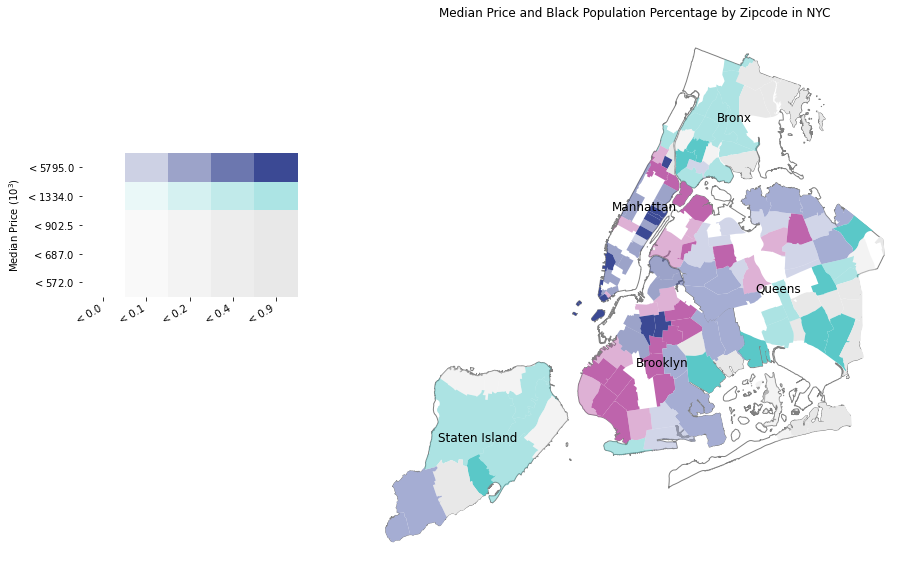

In [56]:
x = merged_shp['p50_by_zip'].values
y = merged_shp['black_by_zip'].values

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

# Plot the borough boundaries
boroughs_shp.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=1)

vba_choropleth(x, y, merged_shp, rgb_variable = 'Median Price', alpha_variable ='Black Population Percentage',
               alpha_mapclassify=dict(classifier='quantiles', k=5),
               rgb_mapclassify=dict(classifier='quantiles', k=5),
               legend=True, ax=ax, divergent=True,
              cmap = my_cmap)

# Add labels to the boroughs
for i, row in boroughs_shp.iterrows():
    ax.annotate(text=row['boro_name'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=12)
    
ax.set_title('Median Price and Black Population Percentage by Zipcode in NYC')
    
plt.savefig("static/Median Price and Black Population Percentage by Zipcode in NYC.png", format="png", bbox_inches='tight')

plt.show()

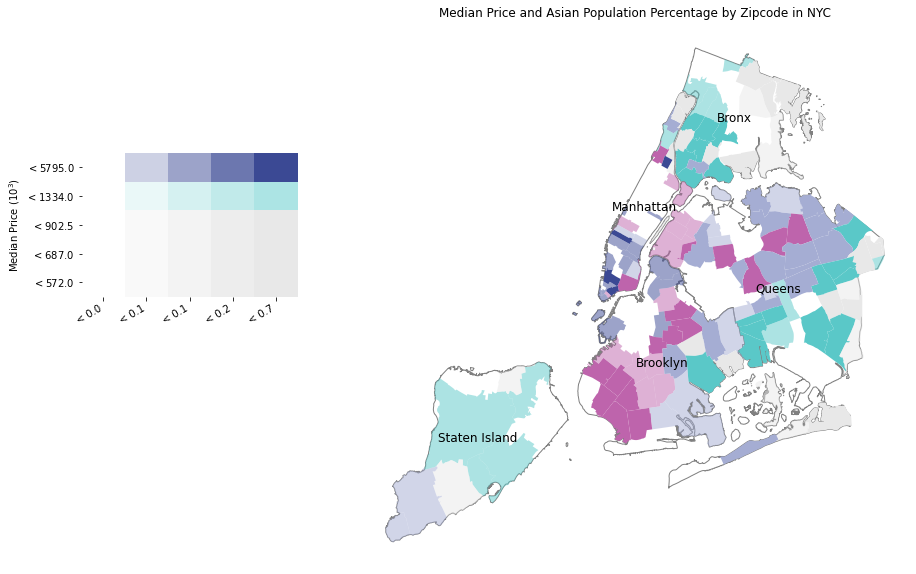

In [57]:
x = merged_shp['p50_by_zip'].values
y = merged_shp['asian_by_zip'].values

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

# Plot the borough boundaries
boroughs_shp.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=1)

vba_choropleth(x, y, merged_shp, rgb_variable = 'Median Price', alpha_variable ='Asian Population Percentage',
               alpha_mapclassify=dict(classifier='quantiles', k=5),
               rgb_mapclassify=dict(classifier='quantiles', k=5),
               legend=True, ax=ax, divergent=True,
              cmap = my_cmap)

# Add labels to the boroughs
for i, row in boroughs_shp.iterrows():
    ax.annotate(text=row['boro_name'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=12)
    
ax.set_title('Median Price and Asian Population Percentage by Zipcode in NYC')
    
plt.savefig("static/Median Price and Asian Population Percentage by Zipcode in NYC.png", format="png", bbox_inches='tight')

plt.show()

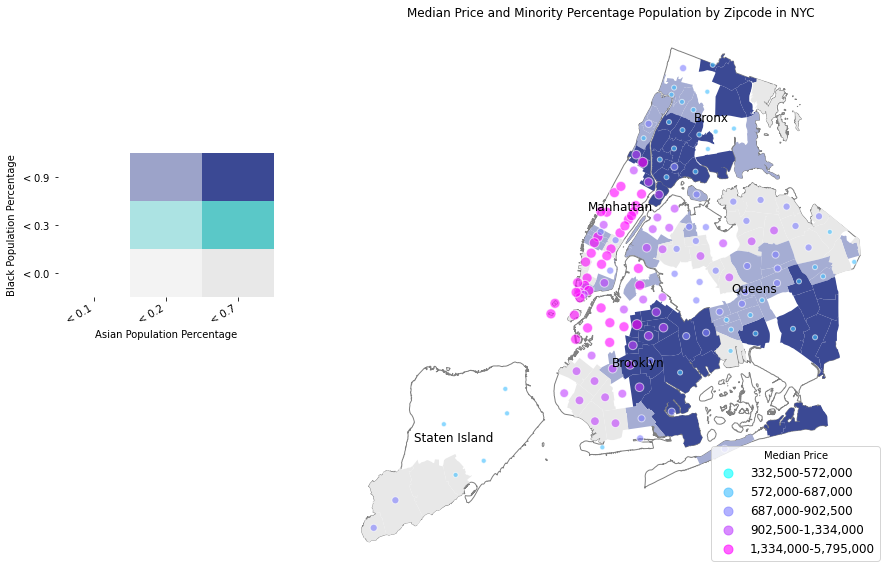

In [58]:
x = merged_shp['black_by_zip'].values
y = merged_shp['asian_by_zip'].values

merged_shp['p50_bins'] = pd.qcut(merged_shp['p50_by_zip'], q=5, labels=False)
z = merged_shp['p50_bins'].values

# Get the bin edges and labels
_, bin_edges = pd.qcut(merged_shp['p50_by_zip'], q=5, retbins=True)
bin_labels = [f'{bin_edges[i]:,.0f}-{bin_edges[i+1]:,.0f}' for i in range(len(bin_edges)-1)]


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

# Plot the borough boundaries
boroughs_shp.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=1)

vba_choropleth(x, y, merged_shp, rgb_variable = 'Black Population Percentage', alpha_variable ='Asian Population Percentage',
               alpha_mapclassify=dict(classifier='quantiles', k=3),
               rgb_mapclassify=dict(classifier='quantiles', k=3),
               legend=True, ax=ax, divergent=True,
              cmap = my_cmap)

# add the bubbles
bubbles = ax.scatter(x=merged_shp['geometry'].centroid.x, y=merged_shp['geometry'].centroid.y, 
                s=z*25, c=z, cmap='cool', edgecolor='white', alpha = 0.6)


# Add labels to the boroughs
for i, row in boroughs_shp.iterrows():
    ax.annotate(text=row['boro_name'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=12)
    
# add a legend for the bubbles
legend = ax.legend(*bubbles.legend_elements(), loc='lower right', title='Median Price', fontsize=12, markerscale=1.5)

# Set the labels for the legend
for i, label in enumerate(bin_labels):
    legend.get_texts()[i].set_text(label)
    
ax.set_title('Median Price and Minority Percentage Population by Zipcode in NYC')
    
plt.savefig("static/Median Price and Minority Percentage Population by Zipcode in NYC.png", format="png", bbox_inches='tight')

plt.show()

In [59]:
# Merge data
merge = [lnp50, black, asian, taxrate, taxinc, mort]

zipcode_shp['ZIPCODE']=pd.to_numeric(zipcode_shp['ZIPCODE'])
merged_shp = pd.merge(zipcode_shp, p50, left_on='ZIPCODE', right_on='address/zipcode')


for x in merge:
    merged_shp = pd.merge(merged_shp, x, on='address/zipcode')
merged_shp.dropna(subset=['taxrate_by_zip', 'taxinc_by_zip', 'mort_by_zip'], inplace=True)  
display(merged_shp)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,address/zipcode,p50_by_zip,lnp50_by_zip,black_by_zip,asian_by_zip,taxrate_by_zip,taxinc_by_zip,mort_by_zip
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",11436,525000.0,13.171154,0.702,0.080,0.84,304385.0,14466.0
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",11213,1210000.0,14.006131,0.697,0.017,0.65,983351.0,15700.0
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",11212,538435.0,13.196418,0.861,0.010,0.65,850251.0,12372.0
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",11225,1300000.0,14.077875,0.732,0.021,0.65,1324938.0,17811.0
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",11218,1300000.0,14.077875,0.082,0.172,0.65,1704415.0,37644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,11373,0,Elmhurst,101282.0,4.265486e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1015508.539 204353.966, 1015508.502 ...",11373,950000.0,13.764217,0.017,0.488,0.84,1220773.0,11201.0
189,11361,0,Bayside,28496.0,5.016352e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1048944.167 222063.575, 1048950.337 ...",11361,890000.0,13.698977,0.027,0.348,0.84,766655.0,19065.0
190,10036,0,New York,23543.0,1.139511e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((989419.213 215672.088, 989967.295 21...",10036,807000.0,13.601030,0.074,0.173,0.88,3291779.0,16894.0
191,11414,0,Howard Beach,26148.0,6.392882e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1025670.681 184011.380, 1025872.813 ...",11414,635000.0,13.361380,0.025,0.028,0.84,789732.0,21222.0


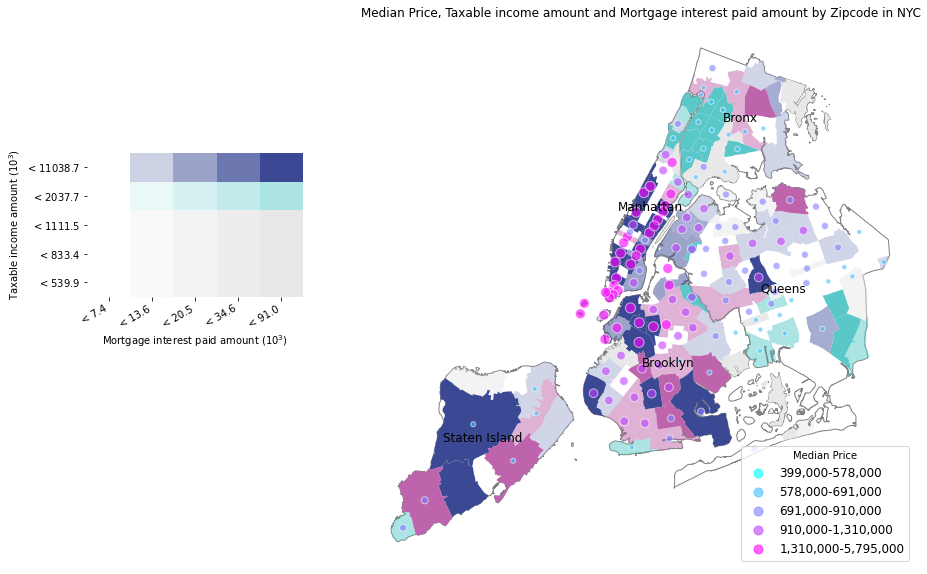

In [60]:
x = merged_shp['taxinc_by_zip'].values
y = merged_shp['mort_by_zip'].values

merged_shp['p50_bins'] = pd.qcut(merged_shp['p50_by_zip'], q=5, labels=False)
z = merged_shp['p50_bins'].values

# Get the bin edges and labels
_, bin_edges = pd.qcut(merged_shp['p50_by_zip'], q=5, retbins=True)
bin_labels = [f'{bin_edges[i]:,.0f}-{bin_edges[i+1]:,.0f}' for i in range(len(bin_edges)-1)]


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

# Plot the borough boundaries
boroughs_shp.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=1)

vba_choropleth(x, y, merged_shp, rgb_variable = 'Taxable income amount', alpha_variable ='Mortgage interest paid amount',
               alpha_mapclassify=dict(classifier='quantiles', k=5),
               rgb_mapclassify=dict(classifier='quantiles', k=5),
               legend=True, ax=ax, divergent=True,
              cmap = my_cmap)

# add the bubbles
bubbles = ax.scatter(x=merged_shp['geometry'].centroid.x, y=merged_shp['geometry'].centroid.y, 
                s=z*25, c=z, cmap='cool', edgecolor='white', alpha = 0.6)


# Add labels to the boroughs
for i, row in boroughs_shp.iterrows():
    ax.annotate(text=row['boro_name'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=12)
    
# add a legend for the bubbles
legend = ax.legend(*bubbles.legend_elements(), loc='lower right', title='Median Price', fontsize=12, markerscale=1.5)

# Set the labels for the legend
for i, label in enumerate(bin_labels):
    legend.get_texts()[i].set_text(label)
    
ax.set_title('Median Price, Taxable income amount and Mortgage interest paid amount by Zipcode in NYC')
    
plt.savefig("static/Median Price, Taxable income amount and Mortgage interest paid amount by Zipcode in NYC.png", format="png", bbox_inches='tight')

plt.show()

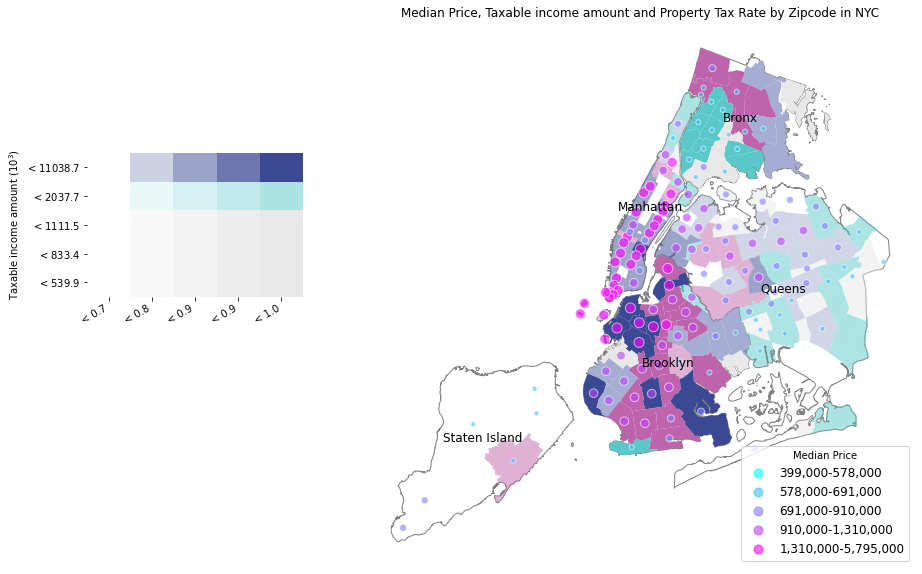

In [61]:
x = merged_shp['taxinc_by_zip'].values
y = merged_shp['taxrate_by_zip'].values

merged_shp['p50_bins'] = pd.qcut(merged_shp['p50_by_zip'], q=5, labels=False)
z = merged_shp['p50_bins'].values

# Get the bin edges and labels
_, bin_edges = pd.qcut(merged_shp['p50_by_zip'], q=5, retbins=True)
bin_labels = [f'{bin_edges[i]:,.0f}-{bin_edges[i+1]:,.0f}' for i in range(len(bin_edges)-1)]


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

# Plot the borough boundaries
boroughs_shp.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=1)

vba_choropleth(x, y, merged_shp, rgb_variable = 'Taxable income amount', alpha_variable ='Property Tax Rate',
               alpha_mapclassify=dict(classifier='quantiles', k=5),
               rgb_mapclassify=dict(classifier='quantiles', k=5),
               legend=True, ax=ax, divergent=True,
              cmap = my_cmap)

# add the bubbles
bubbles = ax.scatter(x=merged_shp['geometry'].centroid.x, y=merged_shp['geometry'].centroid.y, 
                s=z*25, c=z, cmap='cool', edgecolor='white', alpha = 0.6)


# Add labels to the boroughs
for i, row in boroughs_shp.iterrows():
    ax.annotate(text=row['boro_name'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=12)
    
# add a legend for the bubbles
legend = ax.legend(*bubbles.legend_elements(), loc='lower right', title='Median Price', fontsize=12, markerscale=1.5)

# Set the labels for the legend
for i, label in enumerate(bin_labels):
    legend.get_texts()[i].set_text(label)
    
ax.set_title('Median Price, Taxable income amount and Property Tax Rate by Zipcode in NYC')
    
plt.savefig("static/Median Price, Taxable income amount and Property Tax Rate by Zipcode in NYC.png", format="png", bbox_inches='tight')

plt.show()

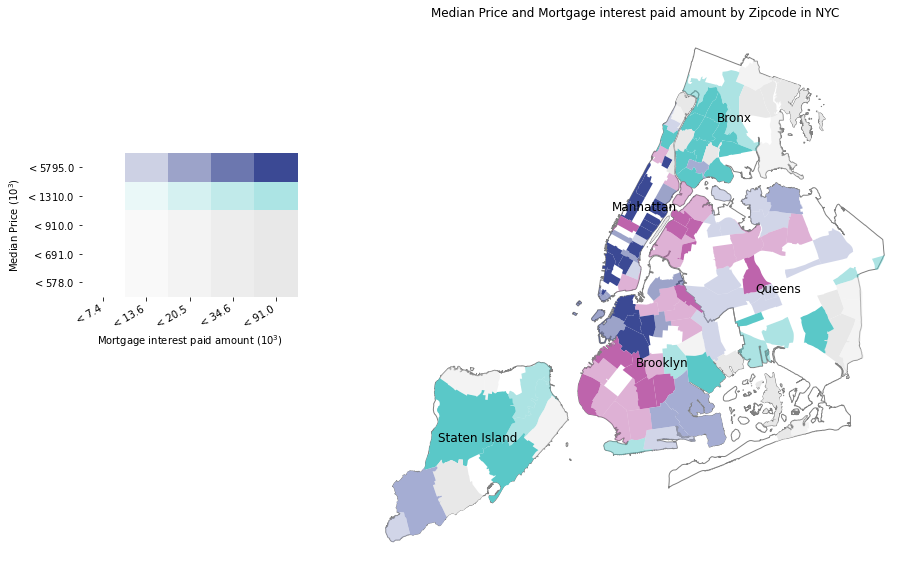

In [62]:
x = merged_shp['p50_by_zip'].values
y = merged_shp['mort_by_zip'].values

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

# Plot the borough boundaries
boroughs_shp.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=1)

vba_choropleth(x, y, merged_shp, rgb_variable = 'Median Price', alpha_variable ='Mortgage interest paid amount',
               alpha_mapclassify=dict(classifier='quantiles', k=5),
               rgb_mapclassify=dict(classifier='quantiles', k=5),
               legend=True, ax=ax, divergent=True,
              cmap = my_cmap)

# Add labels to the boroughs
for i, row in boroughs_shp.iterrows():
    ax.annotate(text=row['boro_name'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=12)
    
ax.set_title('Median Price and Mortgage interest paid amount by Zipcode in NYC')
    
plt.savefig("static/Median Price and Mortgage interest paid amount by Zipcode in NYC.png", format="png", bbox_inches='tight')

plt.show()

In [63]:
# Merge data
merge = [lnp50, black, asian, taxrate, taxinc, mort]

zipcode_shp['ZIPCODE']=pd.to_numeric(zipcode_shp['ZIPCODE'])
merged_shp = pd.merge(zipcode_shp, p50, left_on='ZIPCODE', right_on='address/zipcode')


for x in merge:
    merged_shp = pd.merge(merged_shp, x, on='address/zipcode')
merged_shp.dropna(subset=['taxrate_by_zip'], inplace=True)  
display(merged_shp)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,address/zipcode,p50_by_zip,lnp50_by_zip,black_by_zip,asian_by_zip,taxrate_by_zip,taxinc_by_zip,mort_by_zip
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",11436,525000.0,13.171154,0.702,0.080,0.84,304385.0,14466.0
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",11213,1210000.0,14.006131,0.697,0.017,0.65,983351.0,15700.0
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",11212,538435.0,13.196418,0.861,0.010,0.65,850251.0,12372.0
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",11225,1300000.0,14.077875,0.732,0.021,0.65,1324938.0,17811.0
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",11218,1300000.0,14.077875,0.082,0.172,0.65,1704415.0,37644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,11361,0,Bayside,28496.0,5.016352e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1048944.167 222063.575, 1048950.337 ...",11361,890000.0,13.698977,0.027,0.348,0.84,766655.0,19065.0
190,10036,0,New York,23543.0,1.139511e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((989419.213 215672.088, 989967.295 21...",10036,807000.0,13.601030,0.074,0.173,0.88,3291779.0,16894.0
191,11414,0,Howard Beach,26148.0,6.392882e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1025670.681 184011.380, 1025872.813 ...",11414,635000.0,13.361380,0.025,0.028,0.84,789732.0,21222.0
192,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17...",10310,520000.0,13.161584,0.266,0.056,0.87,600735.0,18695.0


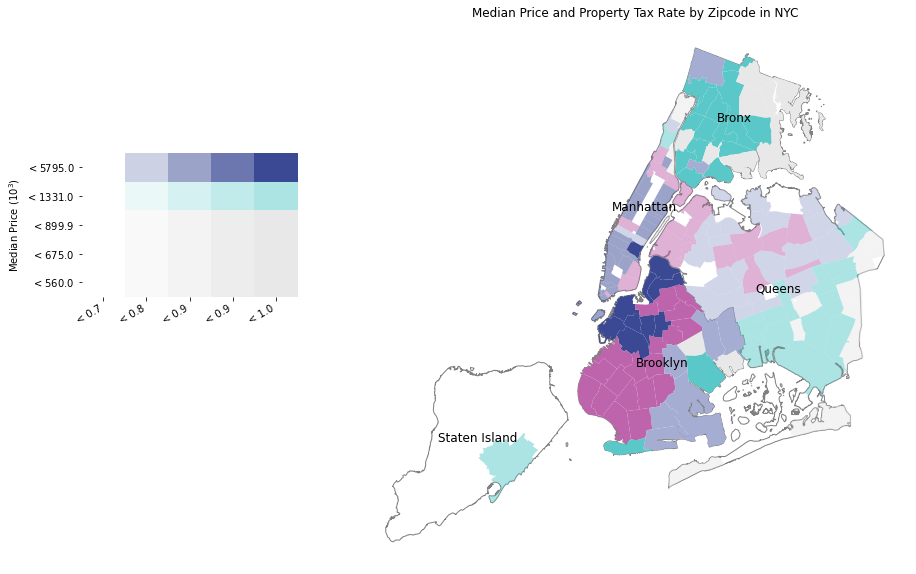

In [64]:
x = merged_shp['p50_by_zip'].values
y = merged_shp['taxrate_by_zip'].values

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

# Plot the borough boundaries
boroughs_shp.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=1)

vba_choropleth(x, y, merged_shp, rgb_variable = 'Median Price', alpha_variable ='Property Tax Rate',
               alpha_mapclassify=dict(classifier='quantiles', k=5),
               rgb_mapclassify=dict(classifier='quantiles', k=5),
               legend=True, ax=ax, divergent=True,
              cmap = my_cmap)

# Add labels to the boroughs
for i, row in boroughs_shp.iterrows():
    ax.annotate(text=row['boro_name'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=12)
    
ax.set_title('Median Price and Property Tax Rate by Zipcode in NYC')
    
plt.savefig("static/Median Price and Property Tax Rate by Zipcode in NYC.png", format="png", bbox_inches='tight')

plt.show()